In [32]:
import os
import re
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from tqdm import tqdm

# To plot
import seaborn as sns
sns.set_theme(style="white")
continuous_map = sns.color_palette("magma", as_cmap=True)
discrete_map = sns.color_palette("Set1")
from matplotlib import pyplot as plt

In [33]:
# Frequency bands
BROADBAND = (0.0, 150.0)
DELTA = (0.0, 4.0)
THETA = (4.0, 8.0)
ALPHA = (8.0, 13.0)
BETA = (13.0, 30.0)
GAMMA = (30.0, 50.0)
HIGH_GAMMA = (50.0, 150.0)

# Parameters 
RESULTS = "Results_Log_Schaefer"

# Every Dataset

## Transform Data

In [34]:
all_corr_path = os.path.join(RESULTS, "PSD_correlations", "All_correlation_every_freq.csv")
all_corr = pd.read_csv(all_corr_path, index_col = 0)

all_corr = pd.DataFrame(all_corr.stack()).reset_index().rename(columns={"level_1" : "columns", 0 : "values"})
all_corr["columns"] = all_corr["columns"].apply(lambda x : re.split(" |_", x))
all_corr["TypeCorr"] = all_corr["columns"].apply(lambda x : x[0])
all_corr["TwinType"] = all_corr["columns"].apply(lambda x : x[1])
all_corr["FreqBand"] = all_corr["columns"].apply(lambda x : " ".join(x[2:]))

all_corr.drop(columns=["level_0", "columns"], inplace = True)
all_corr.dropna(axis = 0, inplace=True)

In [35]:
all_corr.head()

,values,TypeCorr,TwinType,FreqBand
0,0.995709,Autocorr,MZ,BROADBAND
1,0.997104,Autocorr,DZ,BROADBAND
2,0.997184,Autocorr,NT,BROADBAND
3,0.994516,Crosscorr,MZ,BROADBAND
4,0.987854,Crosscorr,DZ,BROADBAND


In [36]:
save_corr_path = os.path.join(RESULTS, "PSD_correlations", "All_correlation_every_freq_stacked.csv")
all_corr.to_csv(save_corr_path)

In [37]:
all_acc_path = os.path.join(RESULTS, "PSD_accuracy", "All_accuracies_every_freq.csv")
all_acc = pd.read_csv(all_acc_path, index_col = 0)

all_acc["Acc Crosscorr MZ_BROADBAND"].mean(), all_acc["Acc Crosscorr MZ_BROADBAND"].std()

(0.6201421568627451, 0.04927184067598209)

In [38]:
all_acc_path = os.path.join(RESULTS, "PSD_accuracy", "All_accuracies_every_freq.csv")
all_acc = pd.read_csv(all_acc_path, index_col = 0)

all_acc = pd.DataFrame(all_acc.stack()).reset_index().rename(columns={"level_1" : "columns", 0 : "values"})
all_acc["columns"] = all_acc["columns"].apply(lambda x : re.split("_", x))
all_acc["AccType"] = all_acc["columns"].apply(lambda x : x[0][4:])
all_acc["FreqBand"] = all_acc["columns"].apply(lambda x : " ".join(x[1:]))

all_acc.drop(columns=["level_0", "columns"], inplace = True)
all_acc.dropna(axis = 0, inplace=True)

In [39]:
all_acc.head()

,values,AccType,FreqBand
0,0.862500,Autocorr,BROADBAND
1,0.617647,Crosscorr MZ,BROADBAND
2,0.083333,Crosscorr DZ,BROADBAND
3,0.587500,Autocorr,DELTA
4,0.294118,Crosscorr MZ,DELTA


In [40]:
save_acc_path = os.path.join(RESULTS, "PSD_accuracy", "All_accuracies_every_freq_stacked.csv")
all_acc.to_csv(save_acc_path)

## Plots correlations

Text(0, 0.5, 'Pearson Correlation')

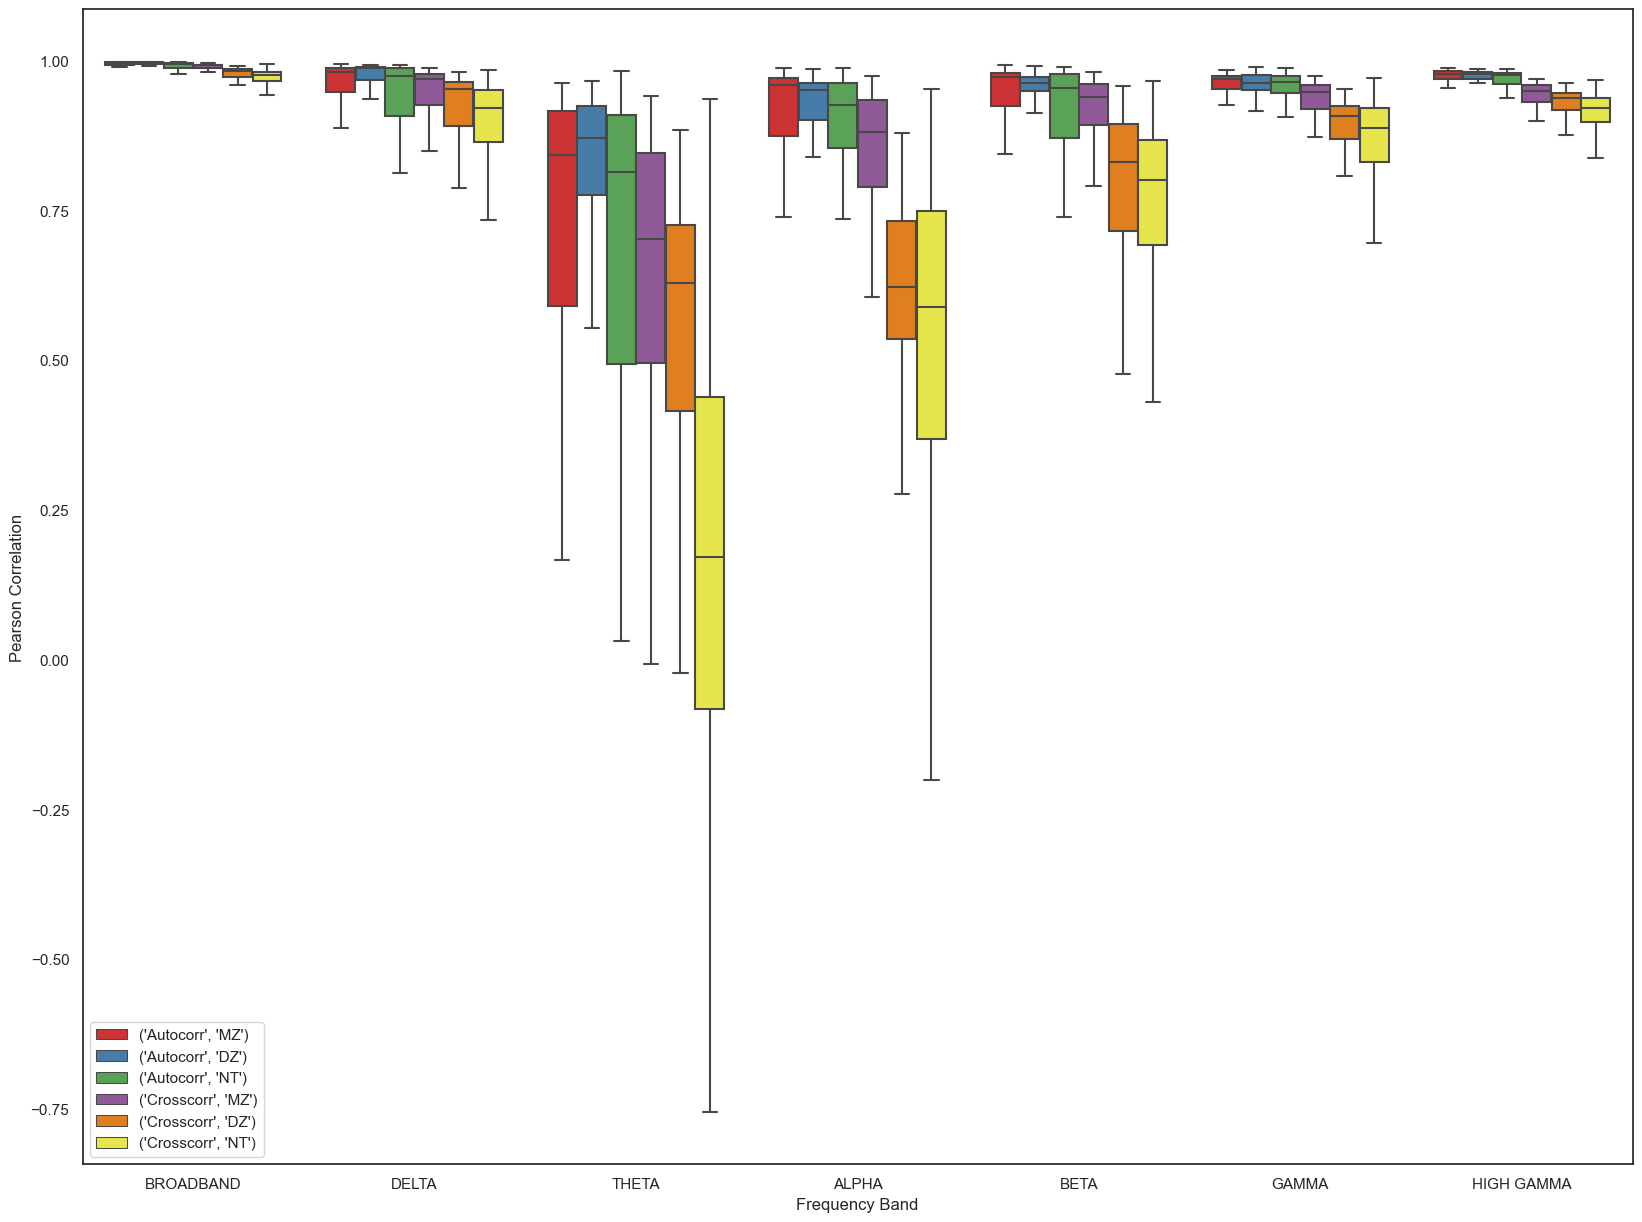

In [22]:
fig,ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data=all_corr, x="FreqBand", y="values", hue=all_corr[['TypeCorr', 'TwinType']].apply(tuple, axis=1), ax=ax, showfliers=False, palette=discrete_map)
ax.set_xlabel('Frequency Band')
ax.set_ylabel('Pearson Correlation')


/var/folders/bx/pchp8hxx2k9gdgpwhgy8fpvc0000gn/T/ipykernel_93320/564467377.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = all_corr[all_corr["TypeCorr"] == "Crosscorr"][all_corr["TwinType"] != "NT" ]
/var/folders/bx/pchp8hxx2k9gdgpwhgy8fpvc0000gn/T/ipykernel_93320/564467377.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hue = all_corr[all_corr["TypeCorr"] == "Crosscorr"][all_corr["TwinType"] != "NT" ][['TypeCorr', 'TwinType']].apply(tuple, axis=1)


Text(0, 0.5, 'Perason Correlation')

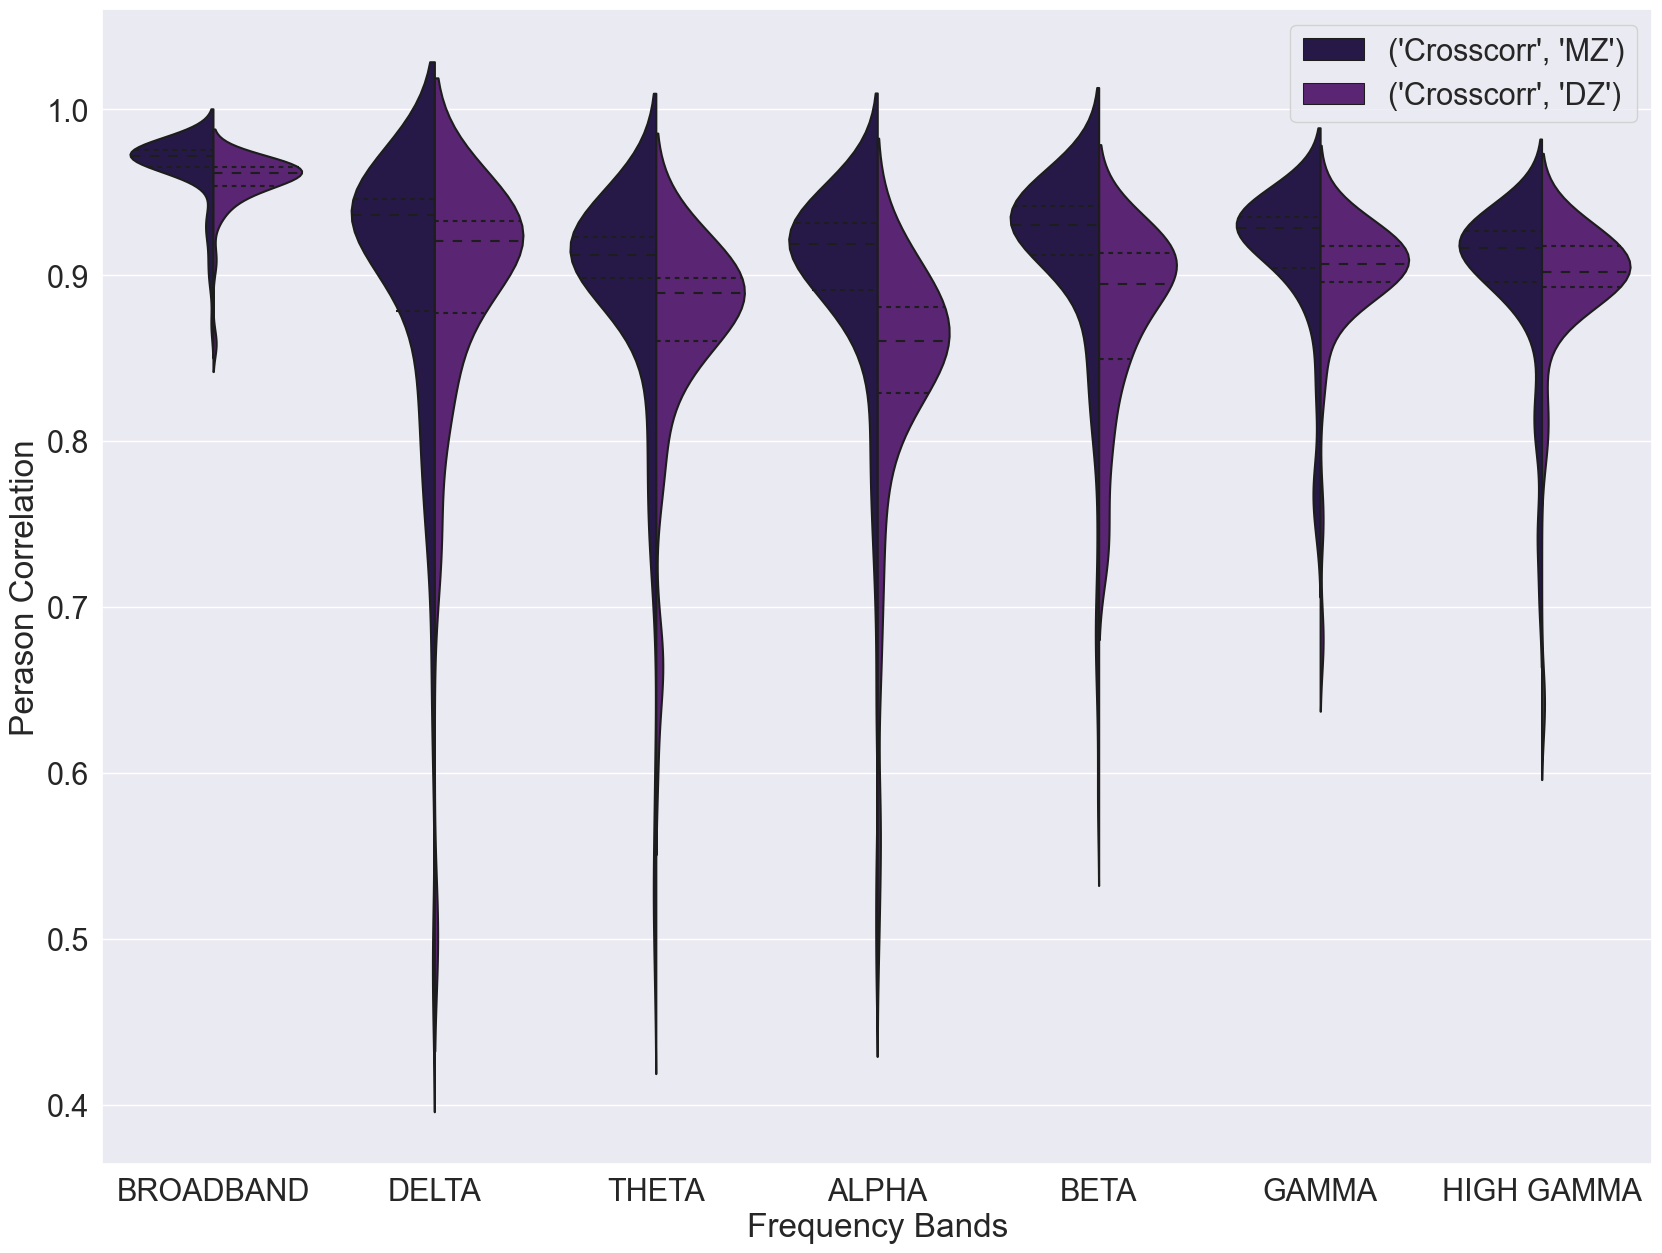

In [71]:
sns.set(font_scale=2)
plt.figure(figsize = (20, 15))
data = all_corr[all_corr["TypeCorr"] == "Crosscorr"][all_corr["TwinType"] != "NT" ]
hue = all_corr[all_corr["TypeCorr"] == "Crosscorr"][all_corr["TwinType"] != "NT" ][['TypeCorr', 'TwinType']].apply(tuple, axis=1)
ax = sns.violinplot(data=data, x="FreqBand", y="values", hue=hue, split = True, inner = "quartile", palette=discrete_map)
ax.set_xlabel("Frequency Bands")
ax.set_ylabel("Perason Correlation")

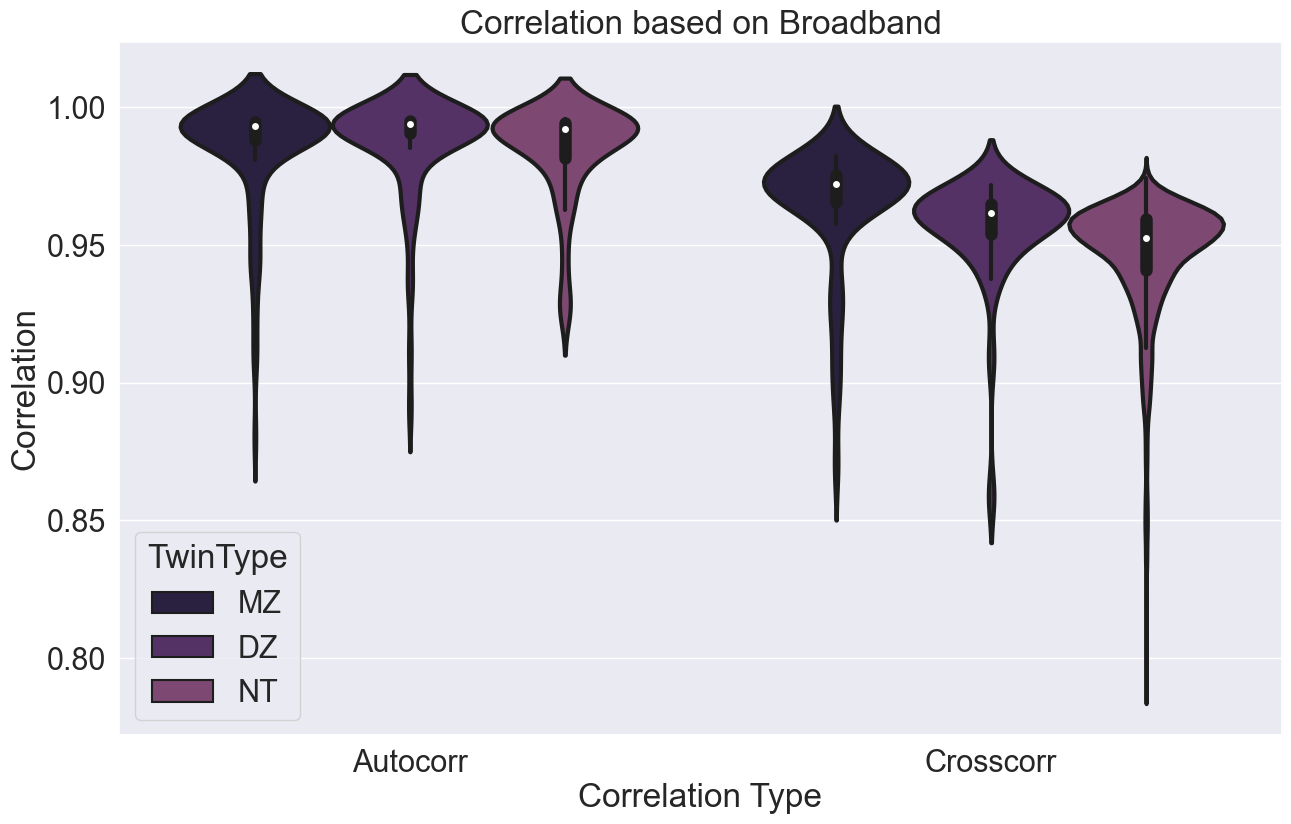

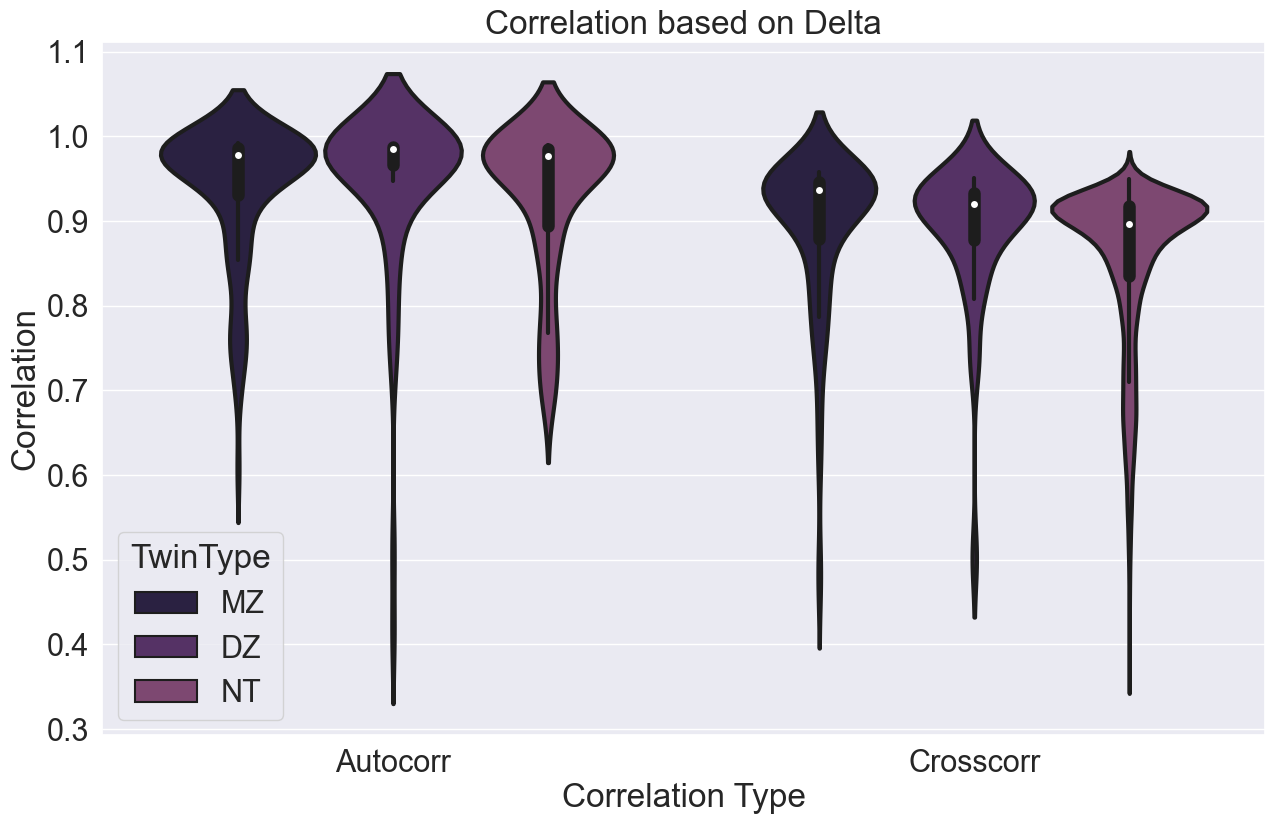

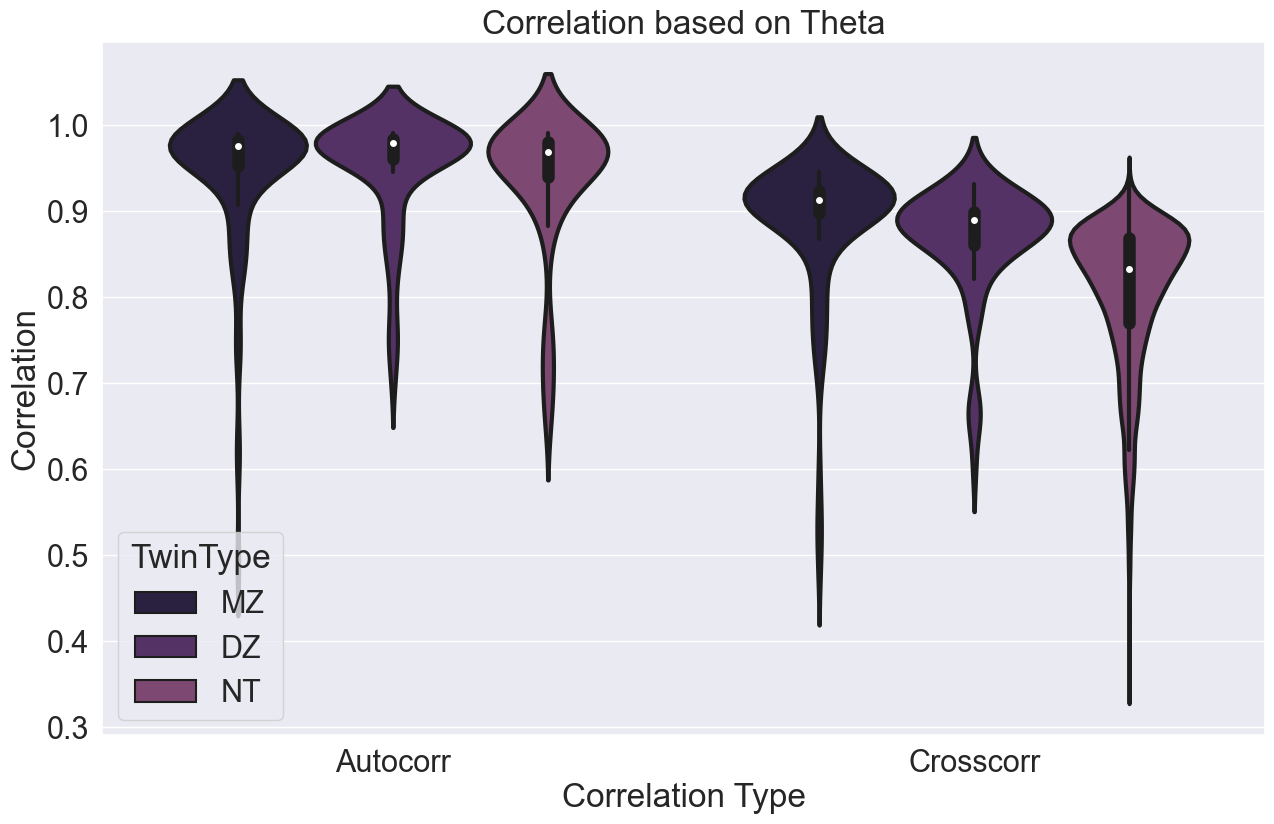

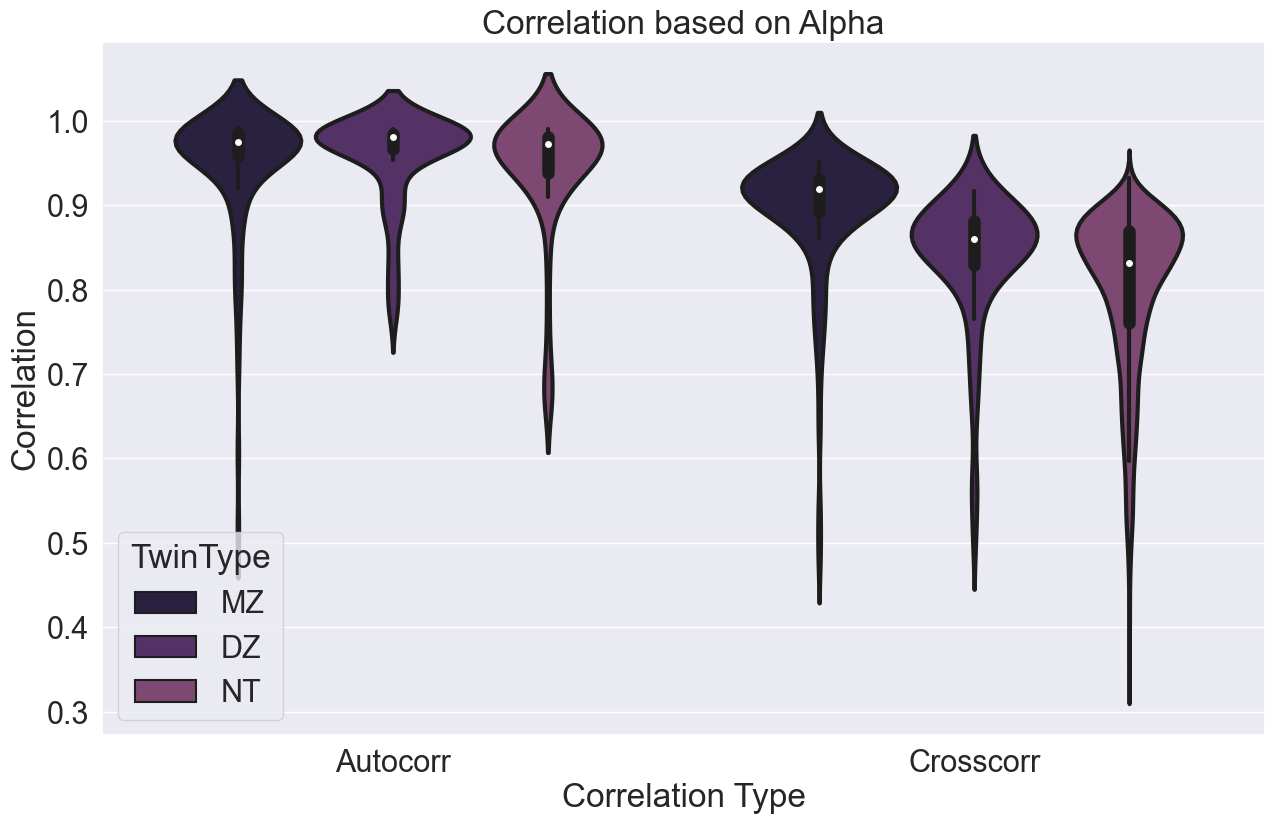

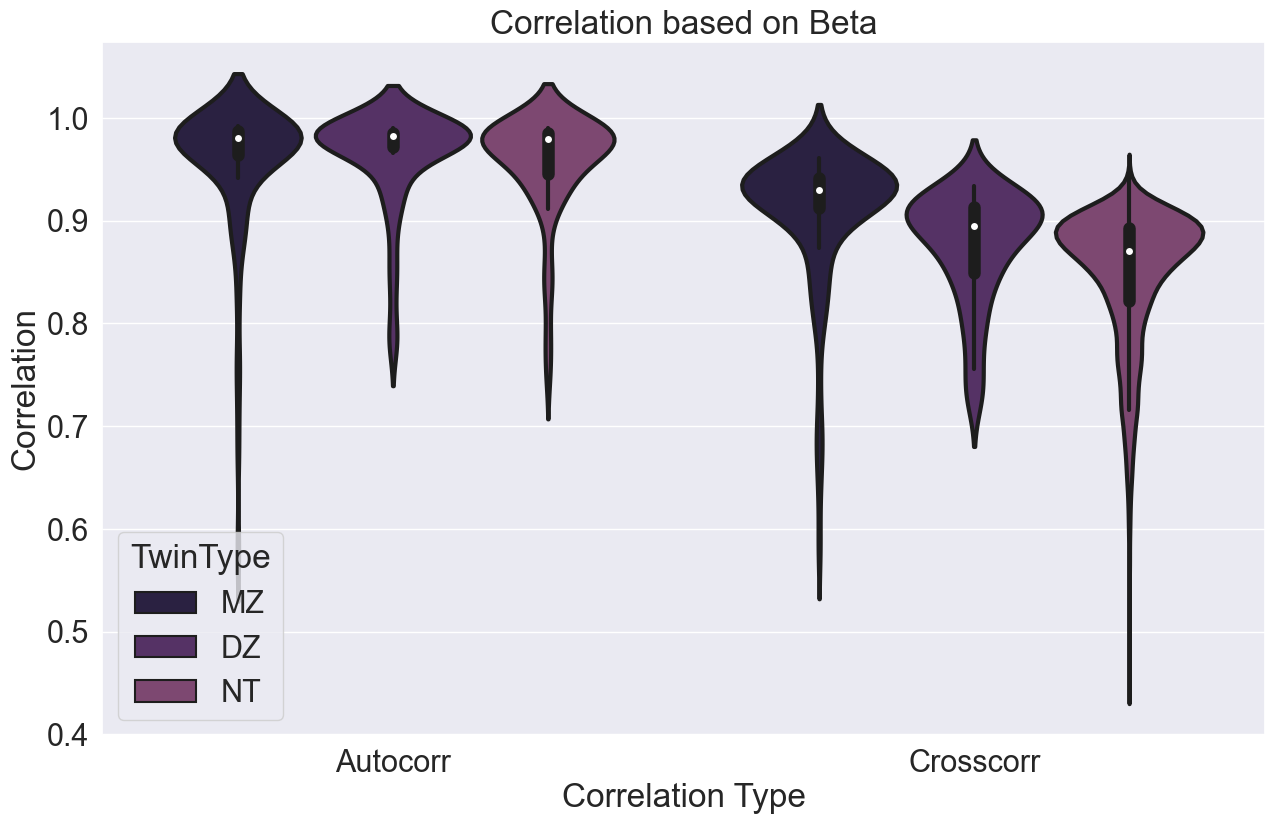

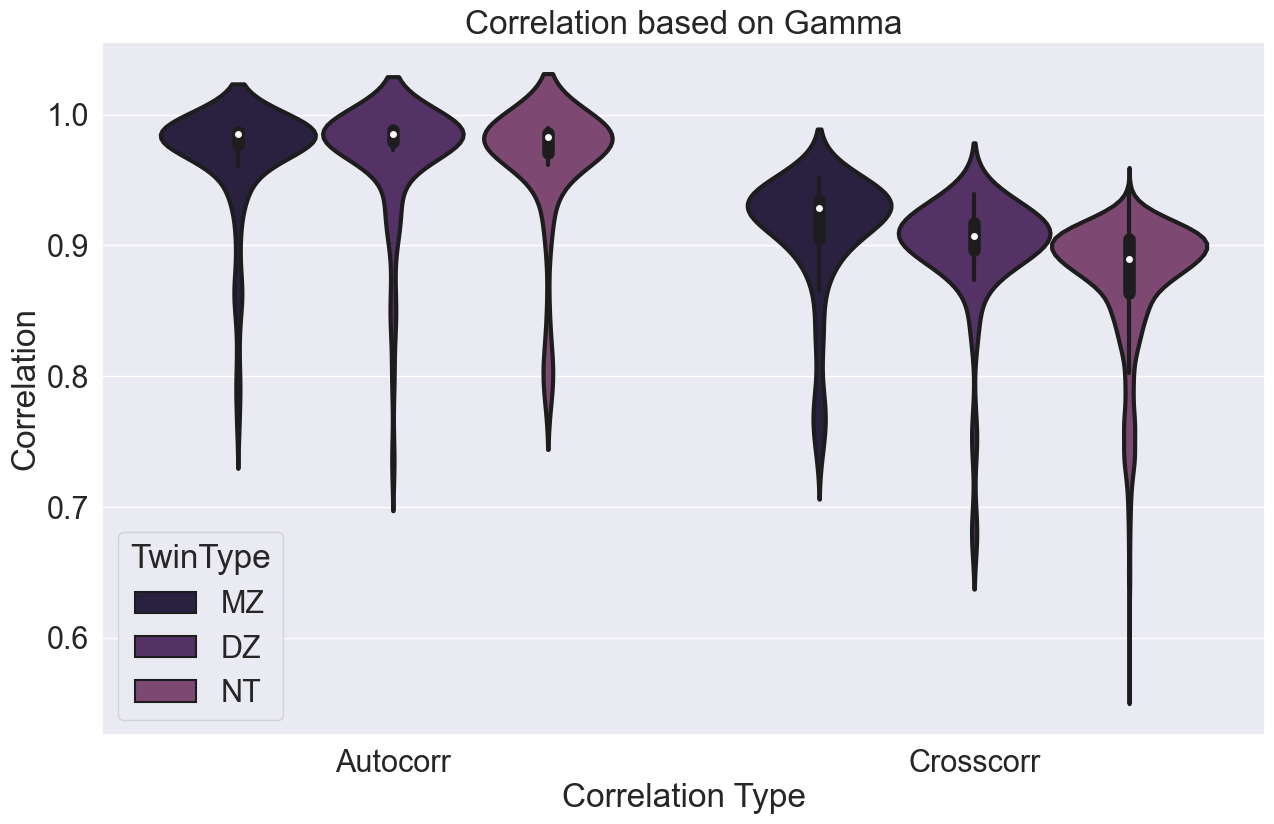

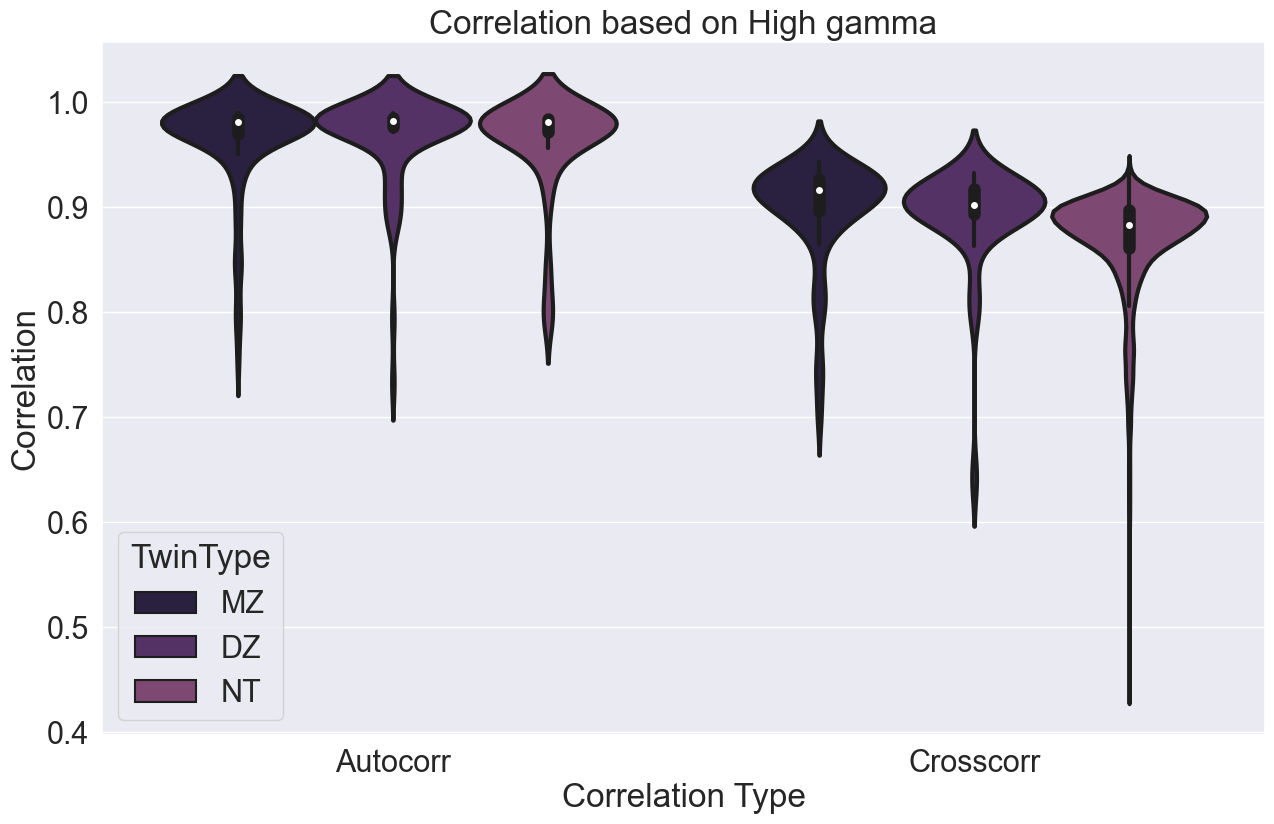

In [72]:
bands = all_corr["FreqBand"].unique()
for band in bands : 
    _, ax = plt.subplots(figsize = (15, 9))
    sns.violinplot(data=all_corr[all_corr["FreqBand"] == band], x="TypeCorr", y="values", hue="TwinType", linewidth=3, saturation=0.5, palette=discrete_map)
    ax.set_xlabel("Correlation Type")
    ax.set_ylabel("Correlation")
    ax.set_title("Correlation based on " + band.lower().capitalize())
    

<Axes: xlabel='TwinType', ylabel='values'>

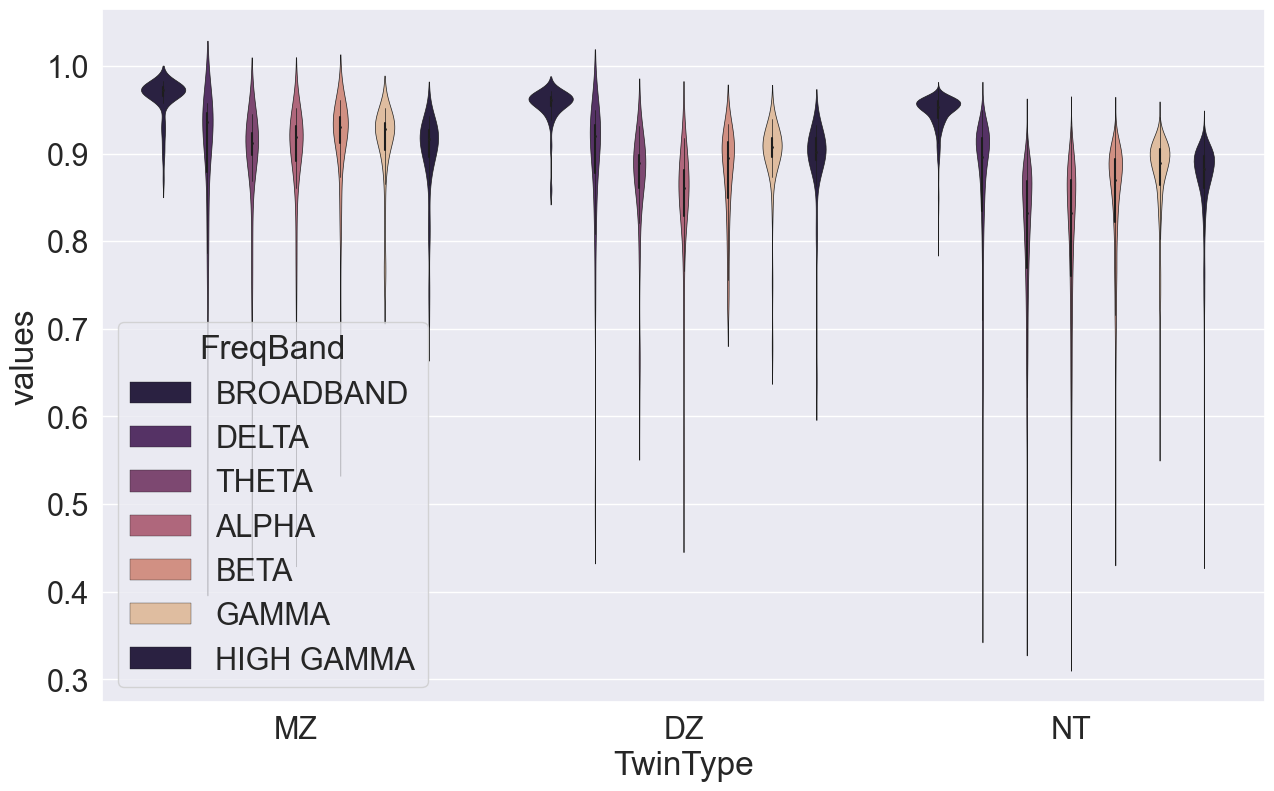

In [73]:
_, ax = plt.subplots(figsize = (15, 9))
sns.violinplot(data=all_corr[all_corr["TypeCorr"] == "Crosscorr"], x="TwinType", y="values", hue="FreqBand", linewidth=0.5, saturation=0.5, palette=discrete_map)

In [26]:
auto_corr = all_corr.loc[all_corr.FreqBand == "BROADBAND"].loc[all_corr.TypeCorr == "Autocorr"]
auto_corr[auto_corr["TwinType"] == "MZ"]

,values,TypeCorr,TwinType,FreqBand
0,0.992486,Autocorr,MZ,BROADBAND
42,0.987280,Autocorr,MZ,BROADBAND
84,0.943295,Autocorr,MZ,BROADBAND
126,0.924225,Autocorr,MZ,BROADBAND
168,0.990518,Autocorr,MZ,BROADBAND
...,...,...,...,...
34174,0.994756,Autocorr,MZ,BROADBAND
34195,0.992234,Autocorr,MZ,BROADBAND
34216,0.992841,Autocorr,MZ,BROADBAND
34237,0.995293,Autocorr,MZ,BROADBAND


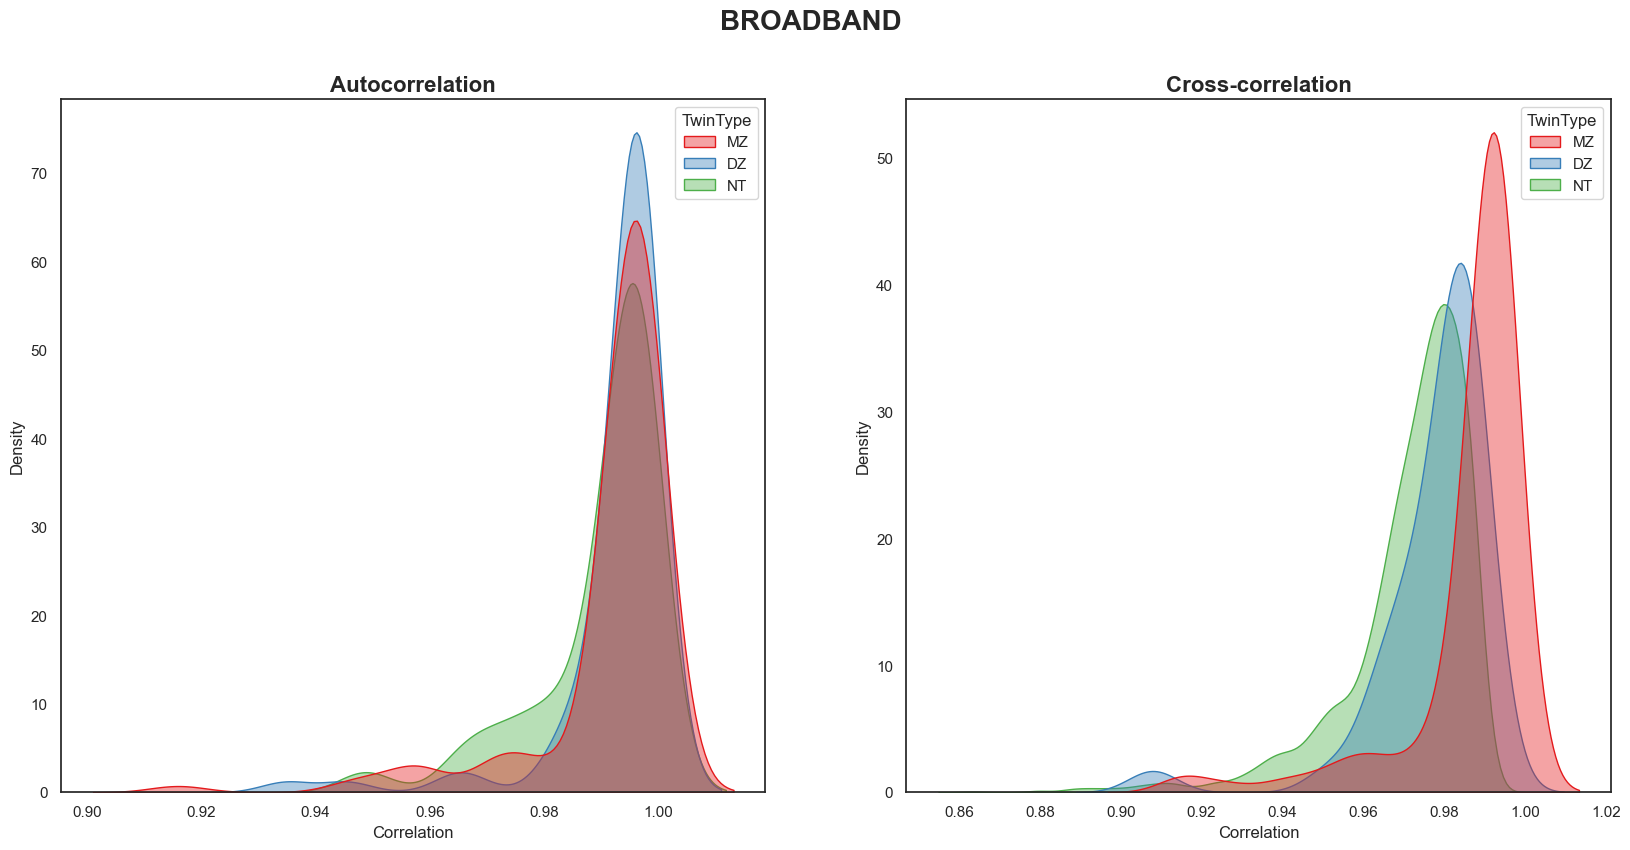

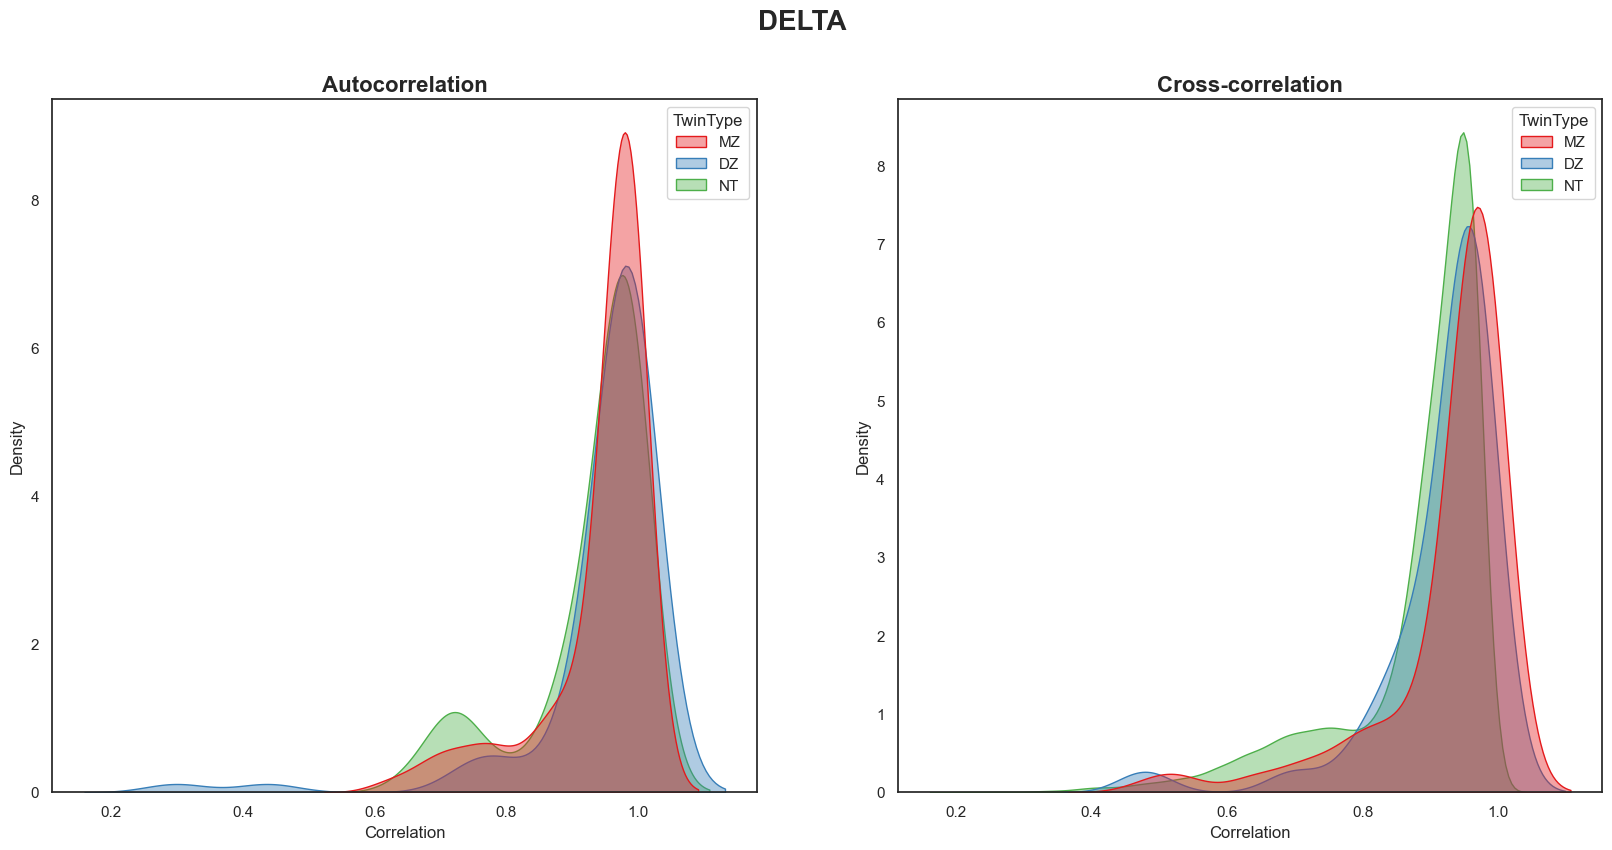

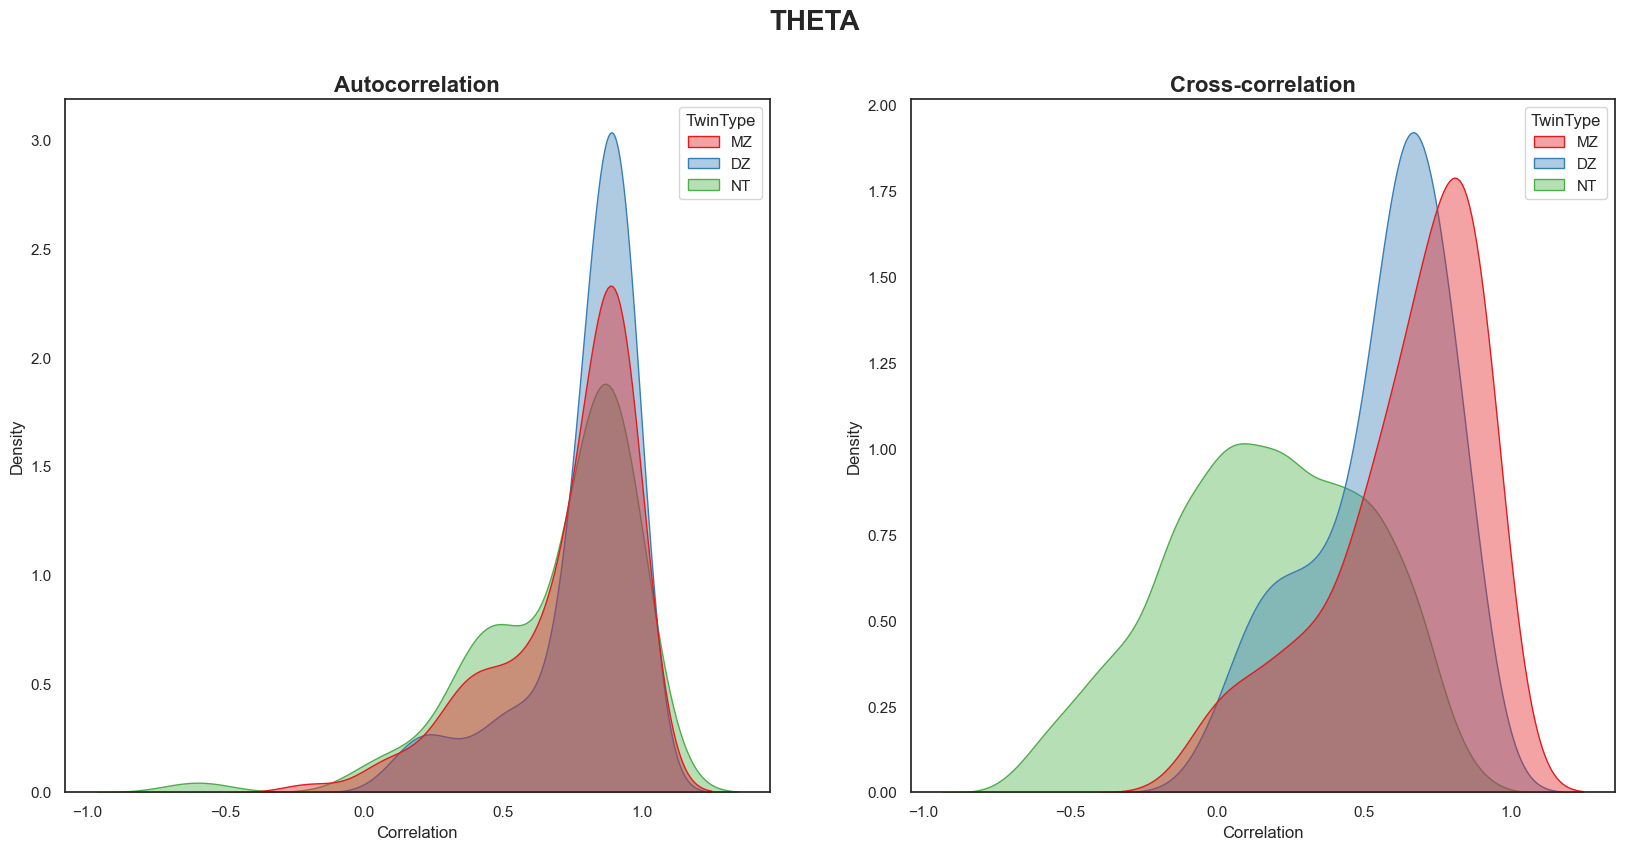

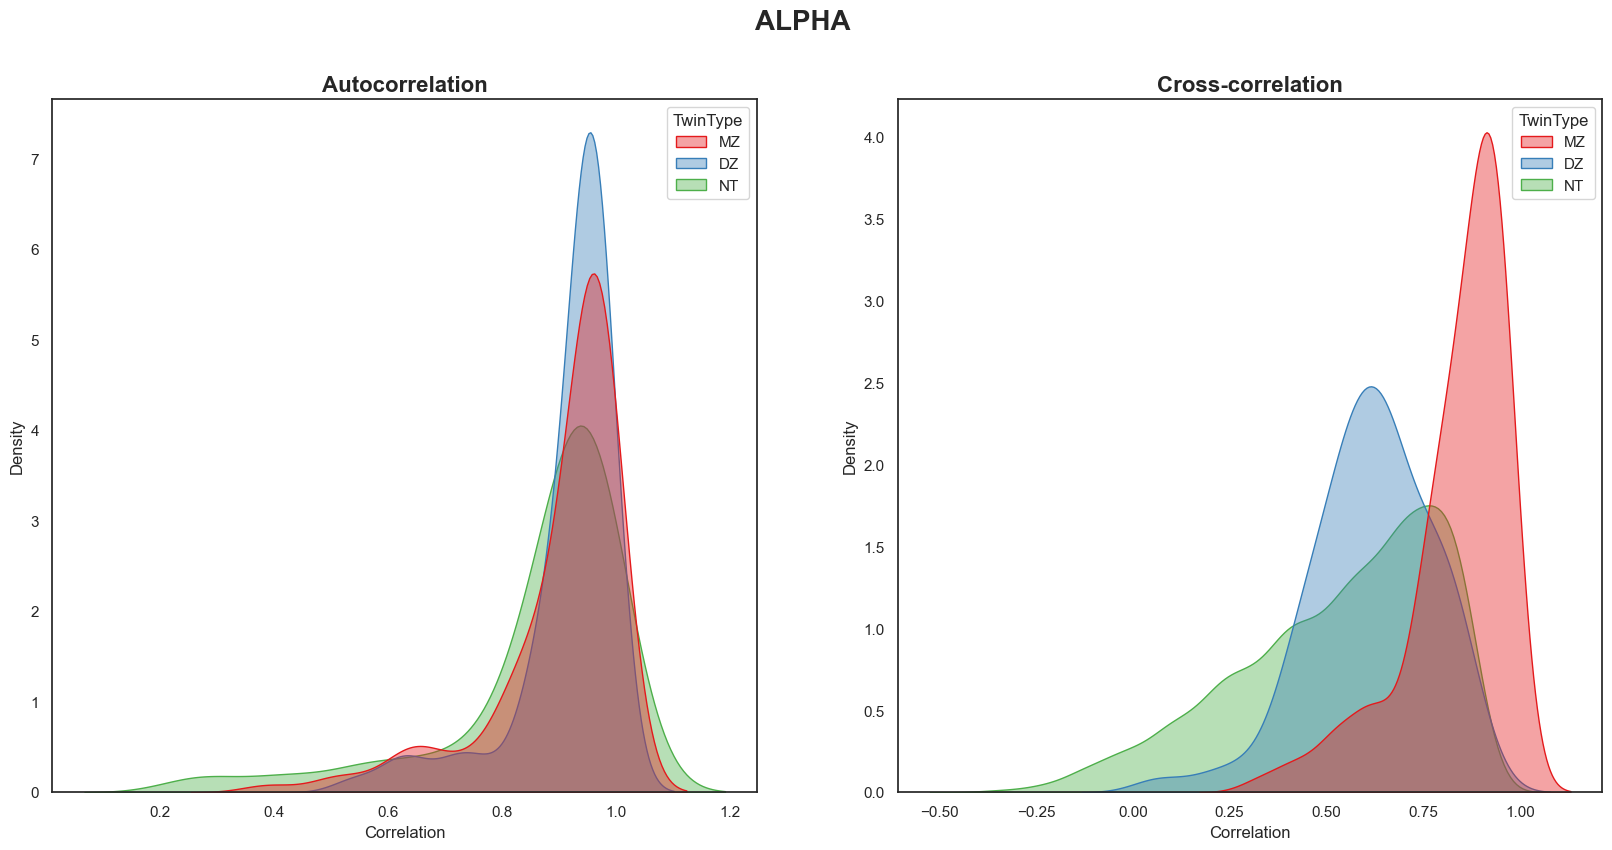

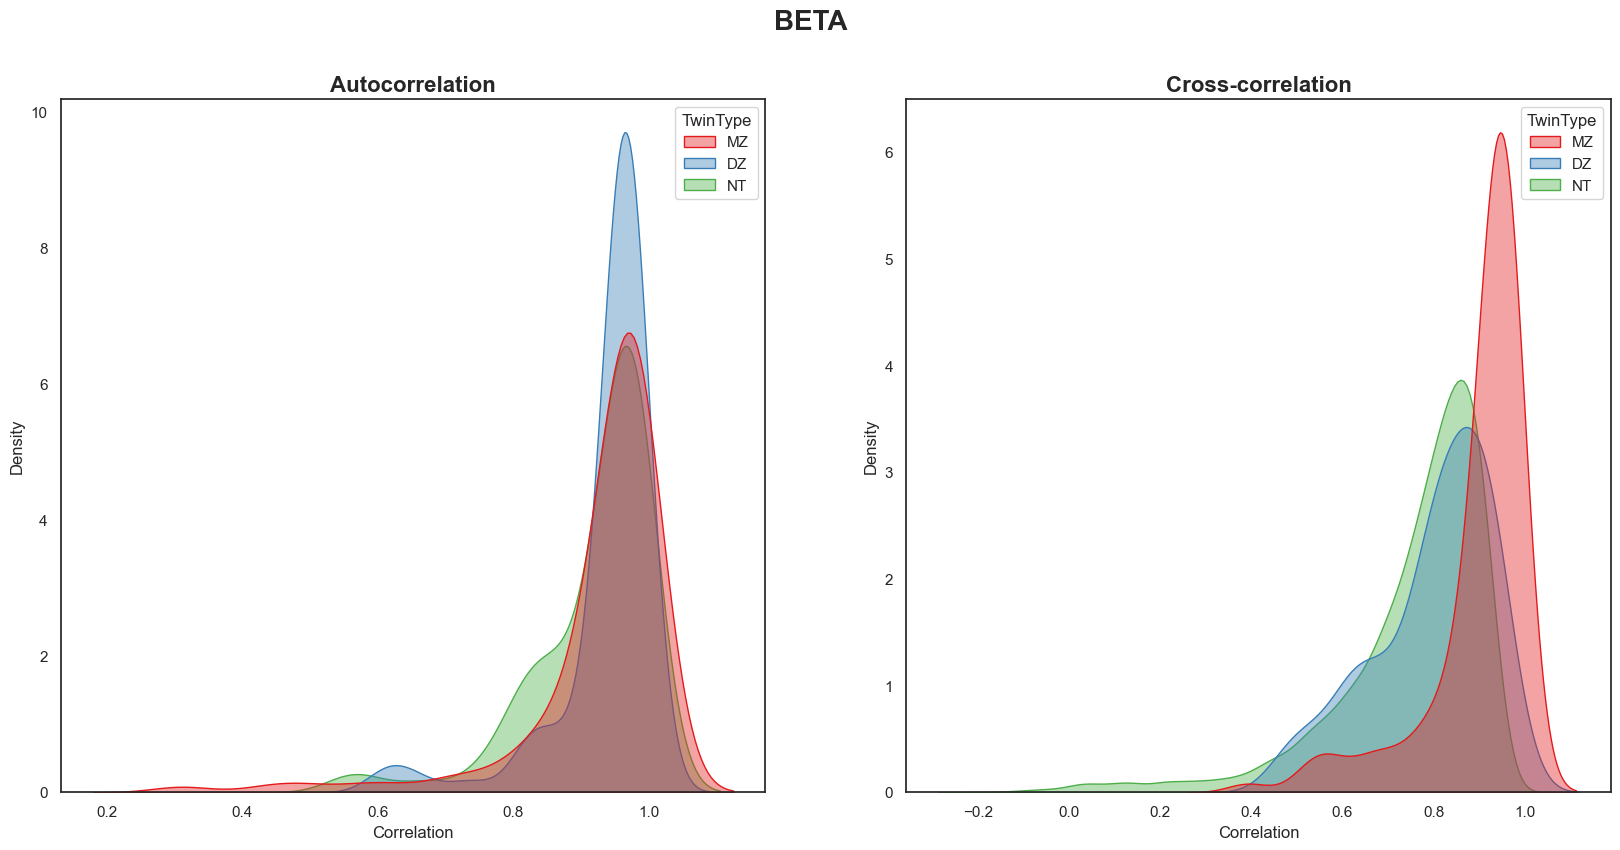

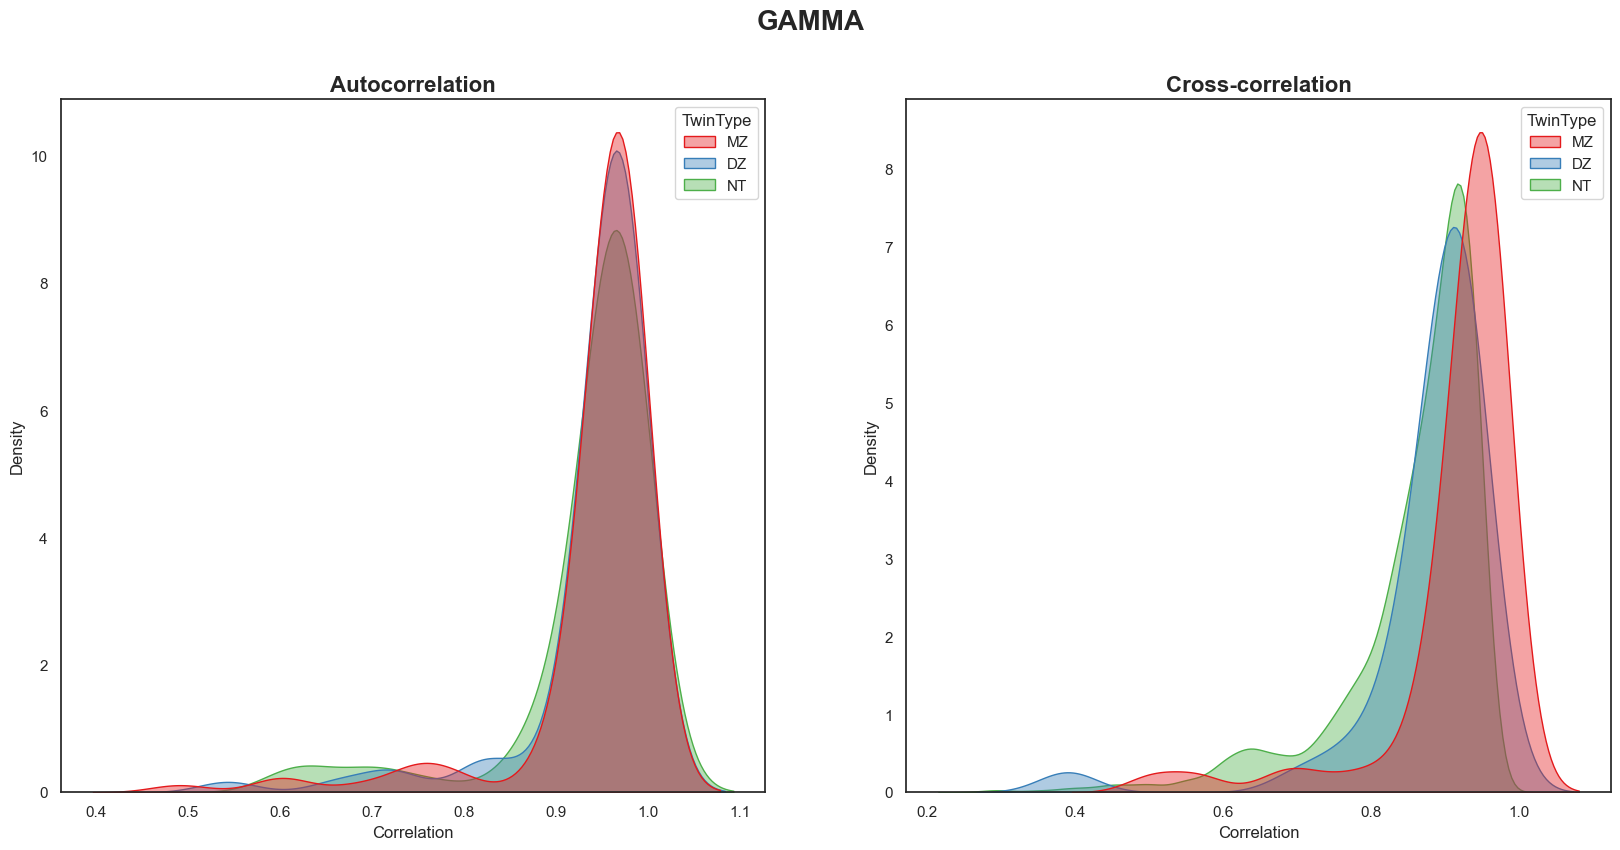

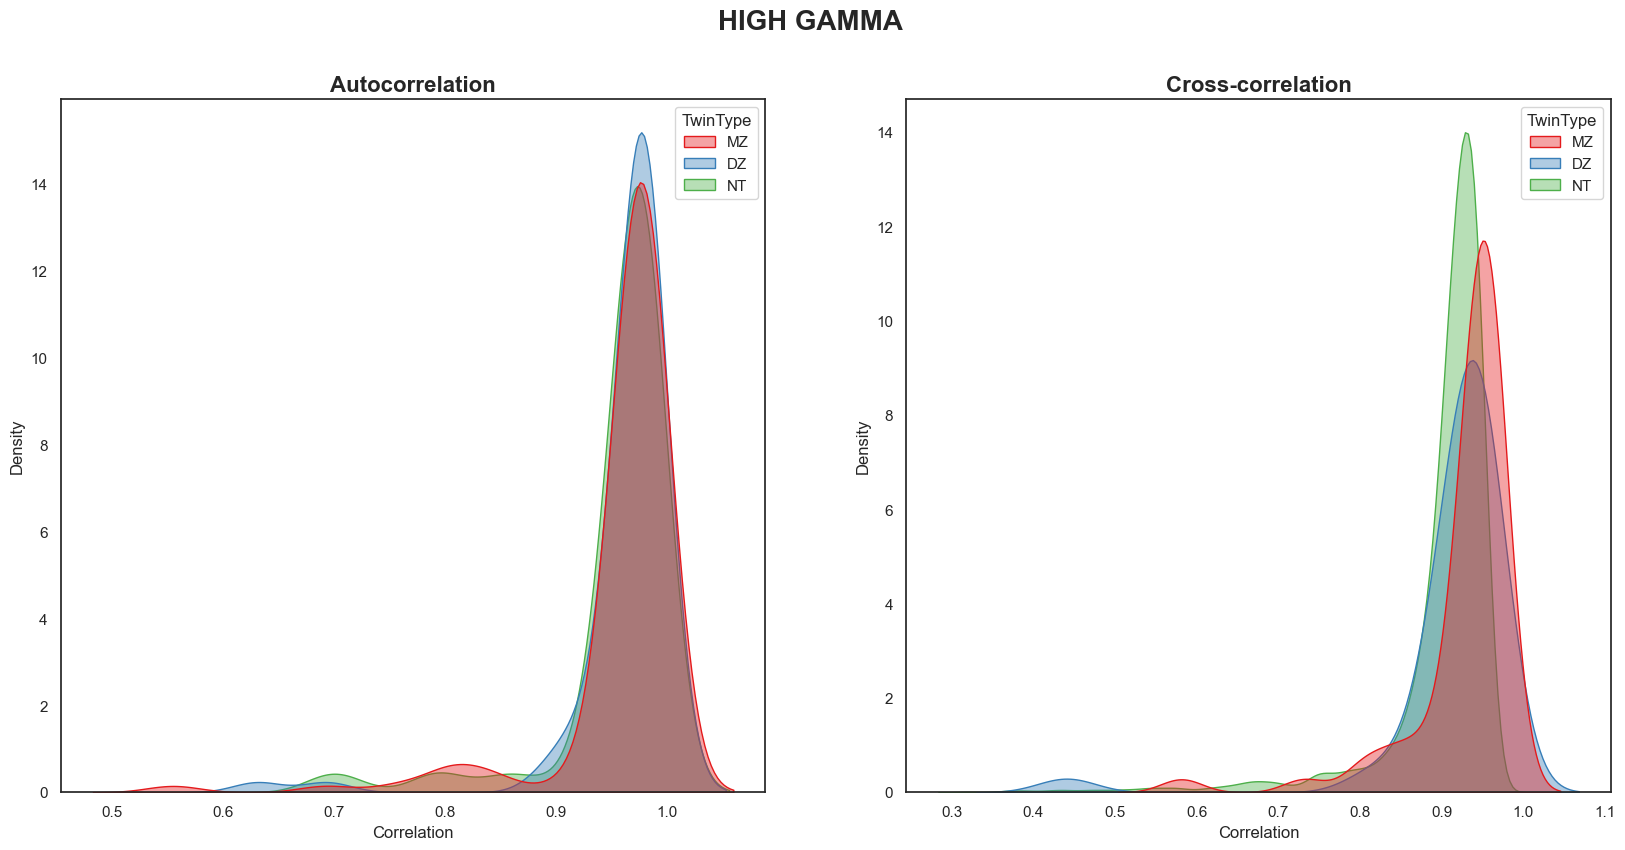

In [12]:
bands = all_corr["FreqBand"].unique()
sns.set(style="white")

for band in bands : 
    
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols= 2, figsize = (20, 9))

    auto_corr = all_corr.loc[all_corr["FreqBand"] == band].loc[all_corr["TypeCorr"] == "Autocorr"]
    sns.kdeplot(data = auto_corr, x = "values", hue = "TwinType", ax = ax0, palette=discrete_map[:3], fill=True, common_norm=False, alpha=0.4)
    ax0.set_xlabel("Correlation")
    ax0.set_ylabel("Density") 
    ax0.set_title("Autocorrelation", fontweight = "bold", size = 16)   

    cross_corr = all_corr.loc[all_corr["FreqBand"] == band].loc[all_corr["TypeCorr"] == "Crosscorr"]
    sns.kdeplot(data = cross_corr, x = "values", hue = "TwinType", ax = ax1, palette=discrete_map[:3], fill=True, common_norm=False, alpha=0.4)
    ax1.set_xlabel("Correlation")
    ax1.set_ylabel("Density")
    ax1.set_title("Cross-correlation", fontweight = "bold", size = 16)   

    fig.suptitle(band, fontsize=20, fontweight = "bold")


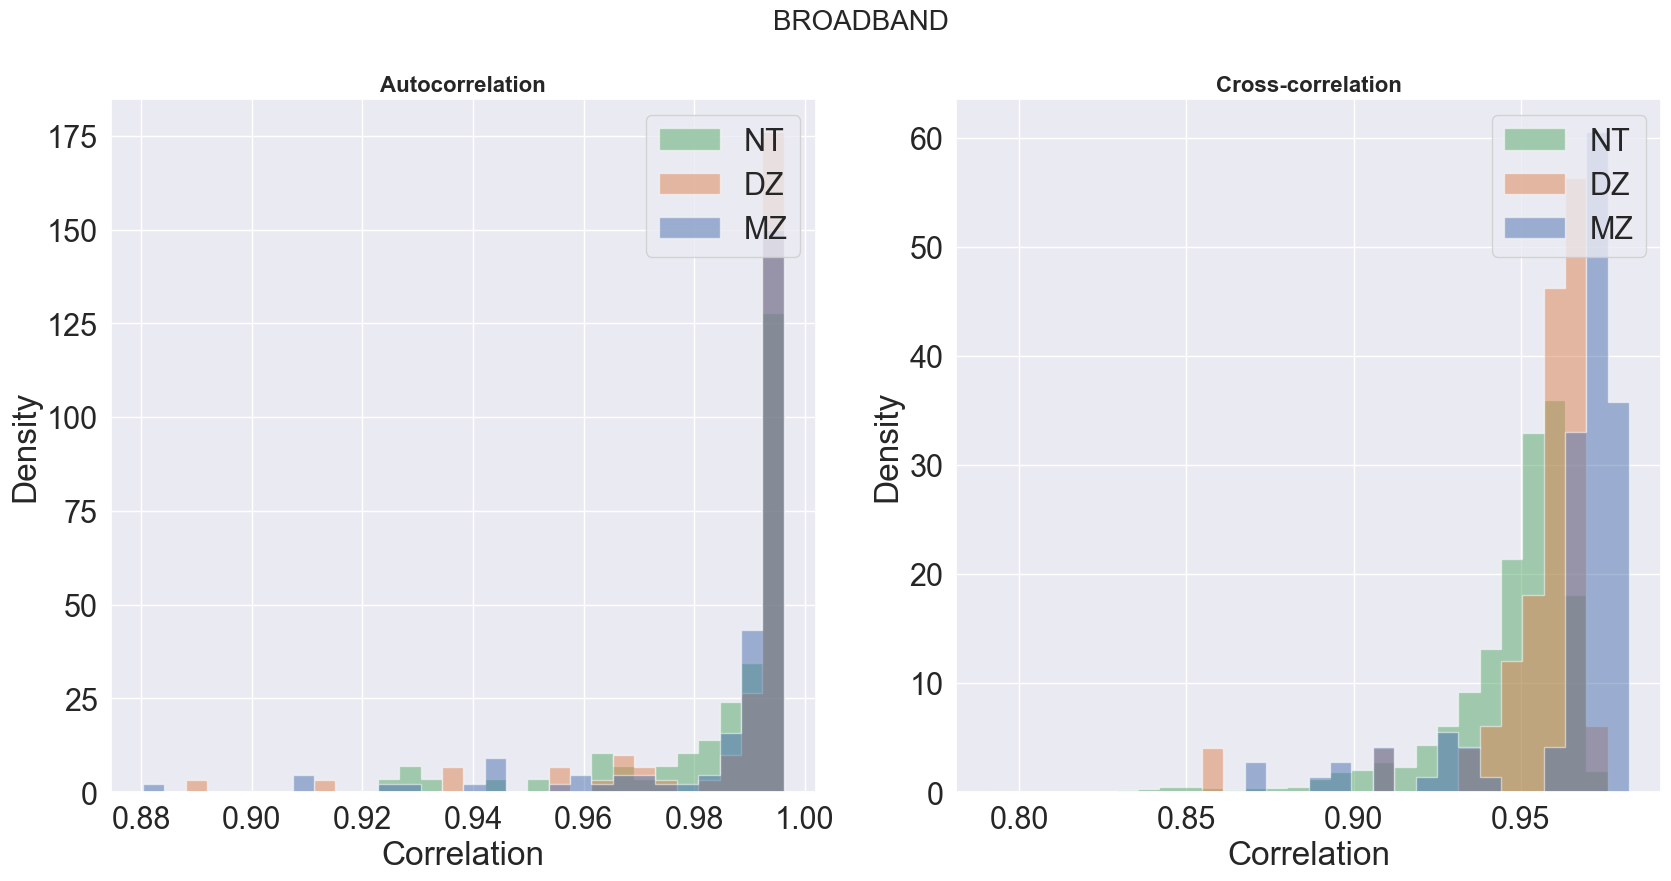

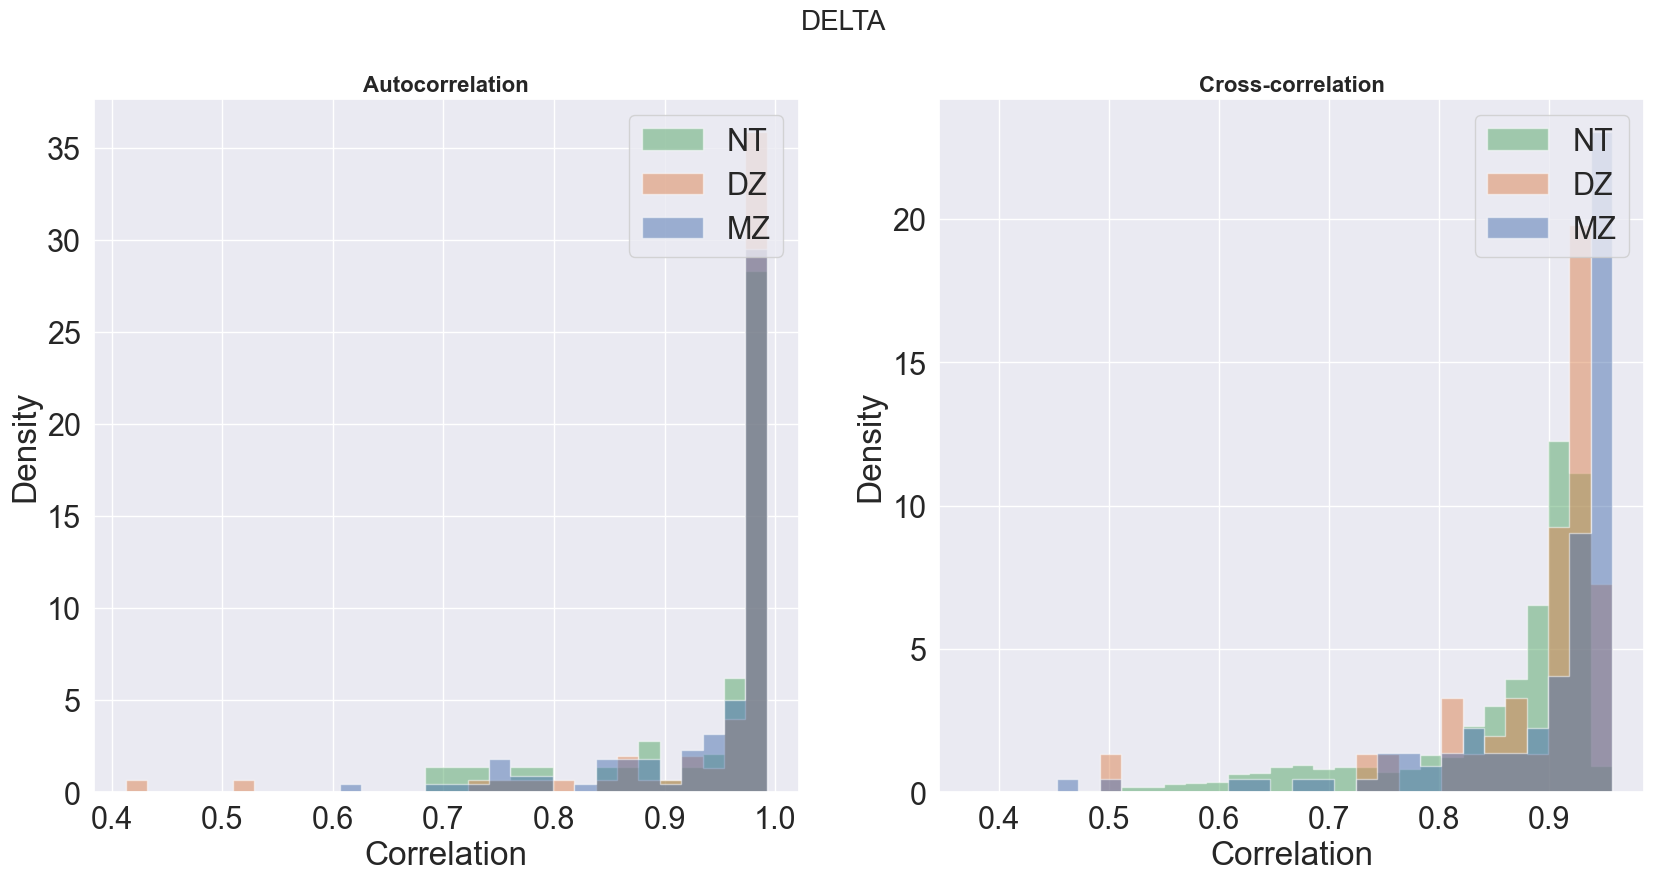

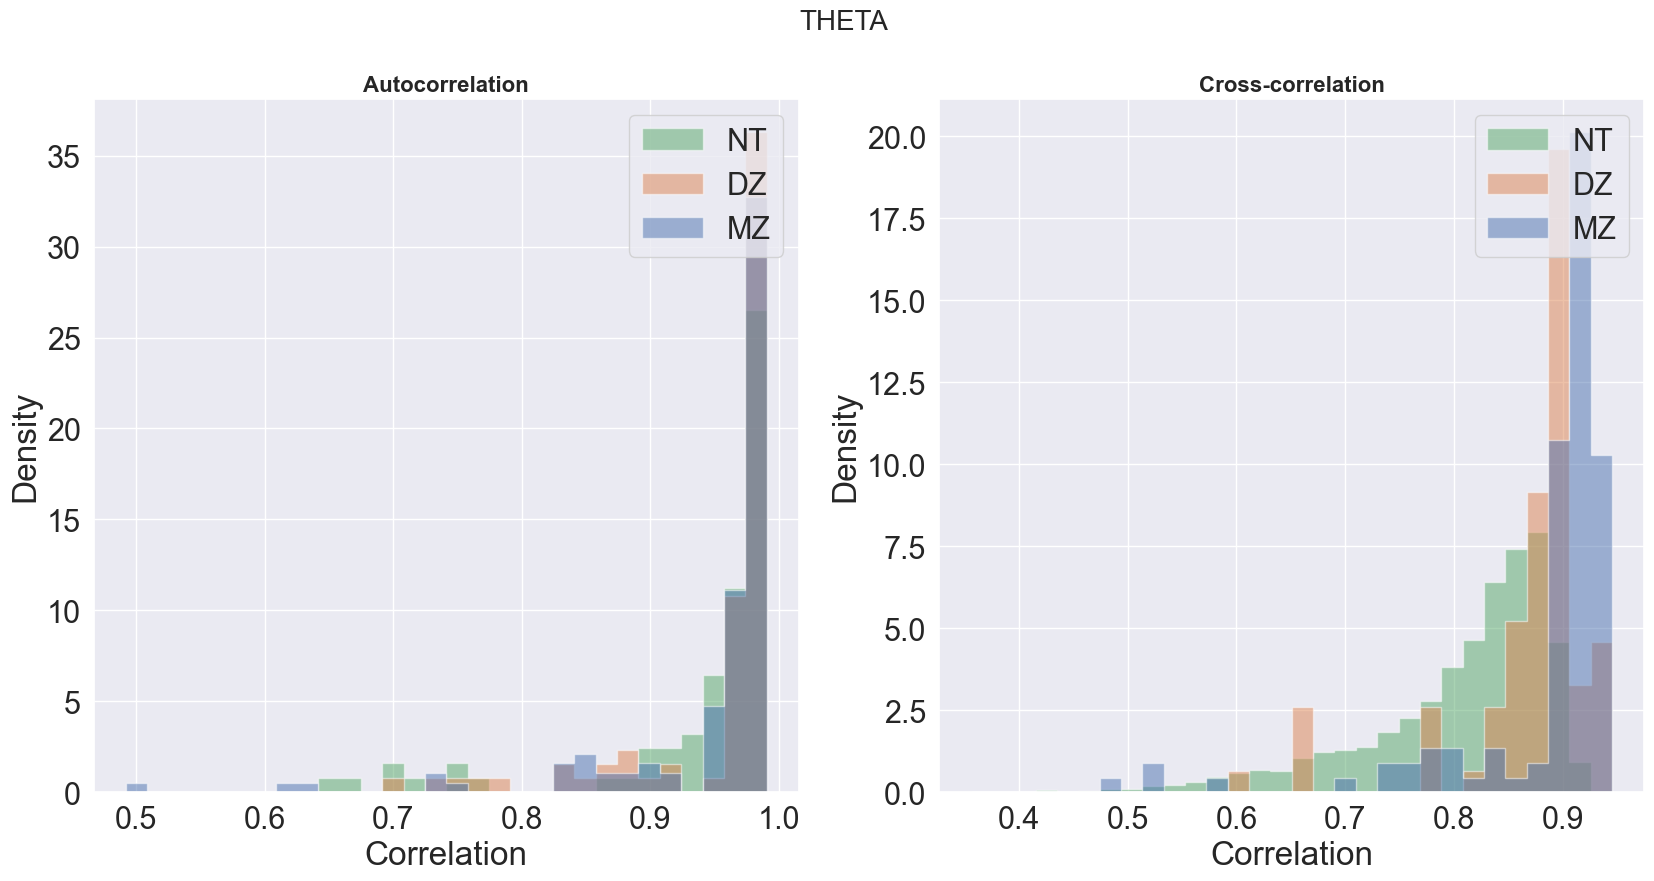

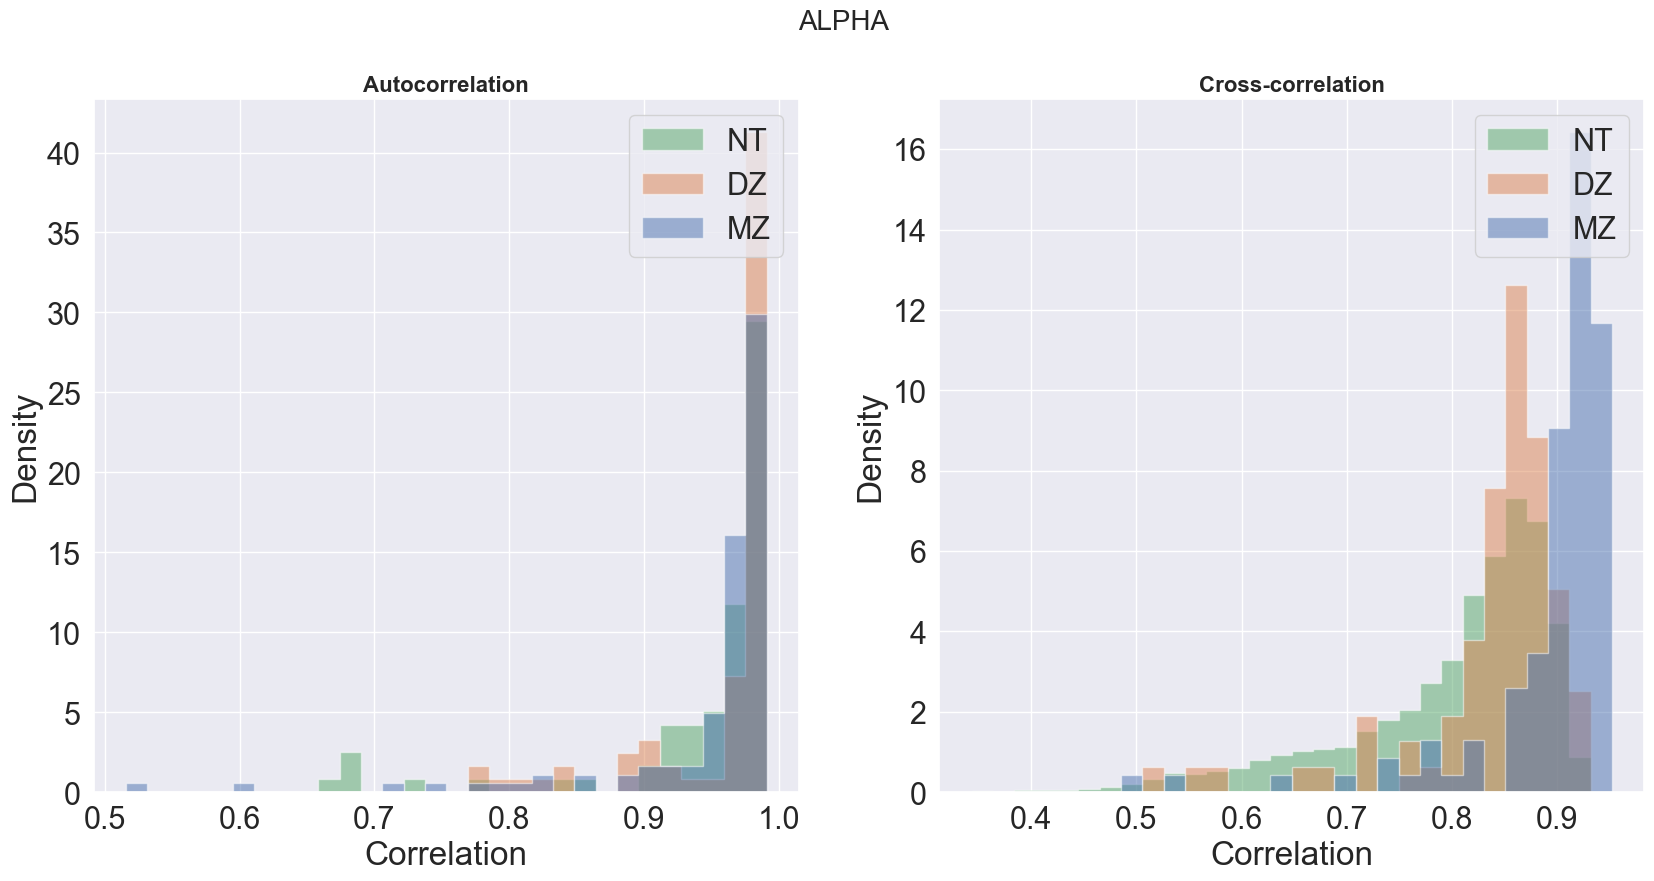

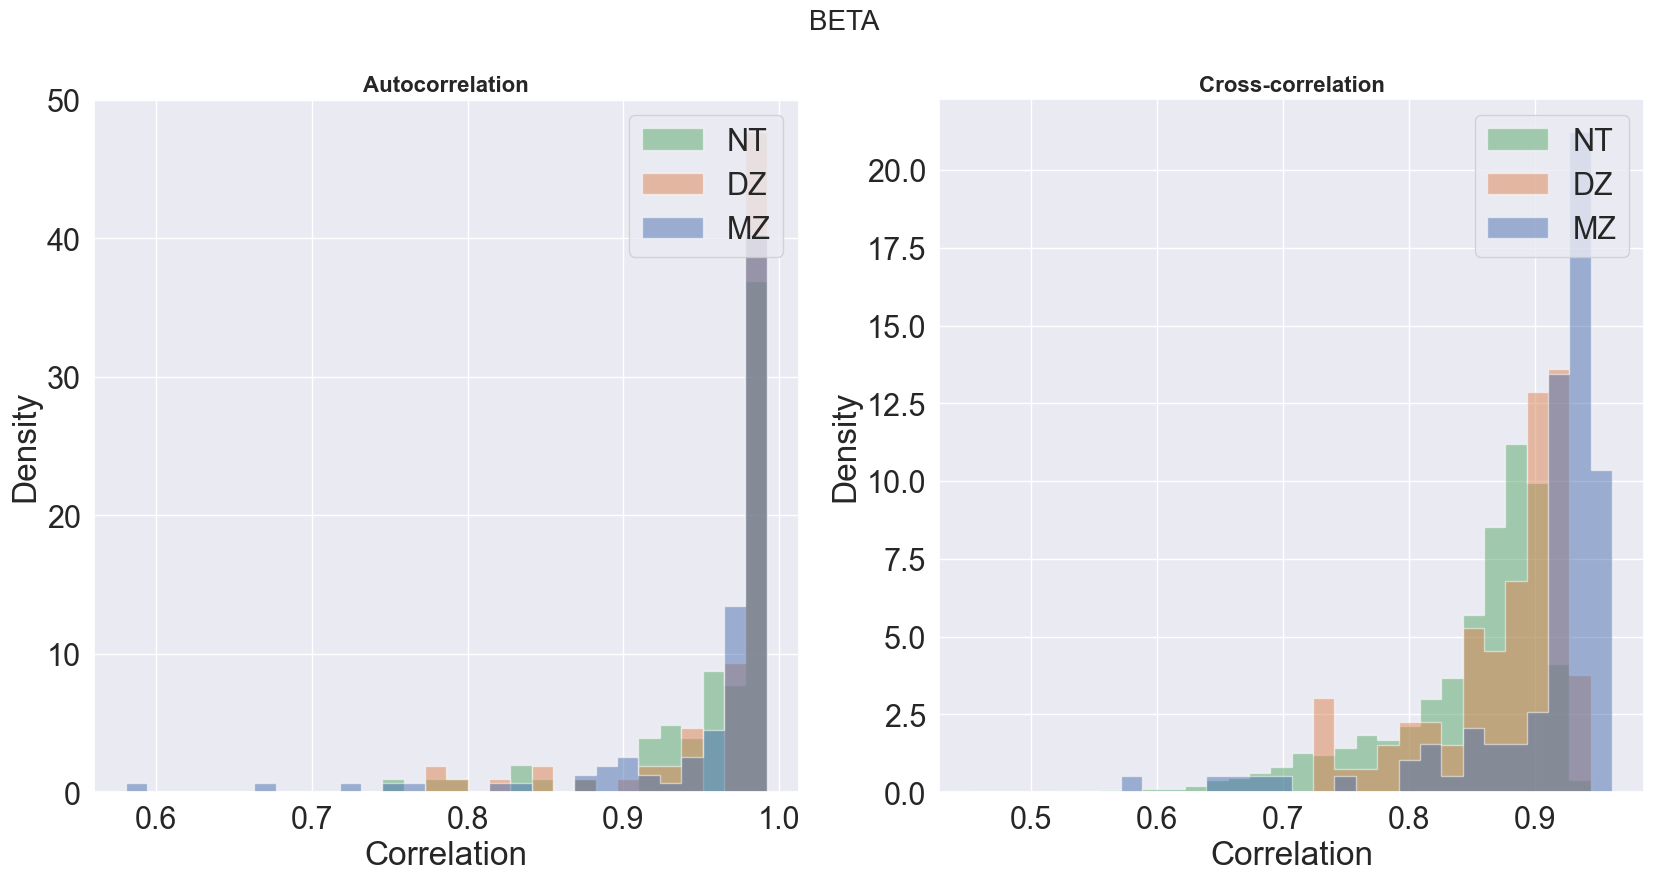

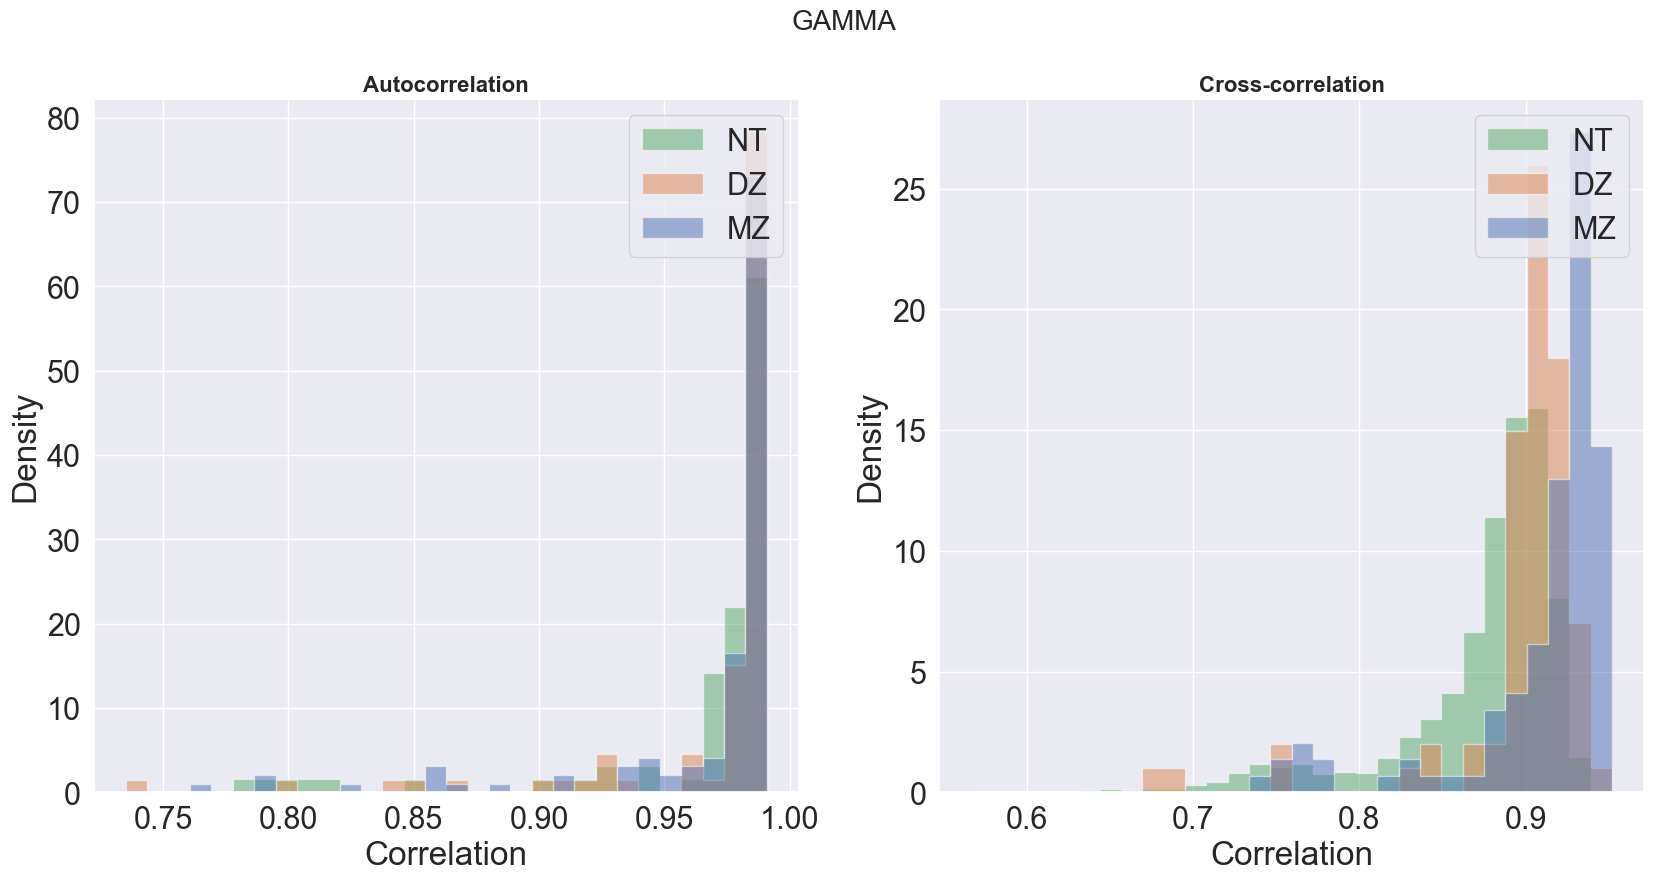

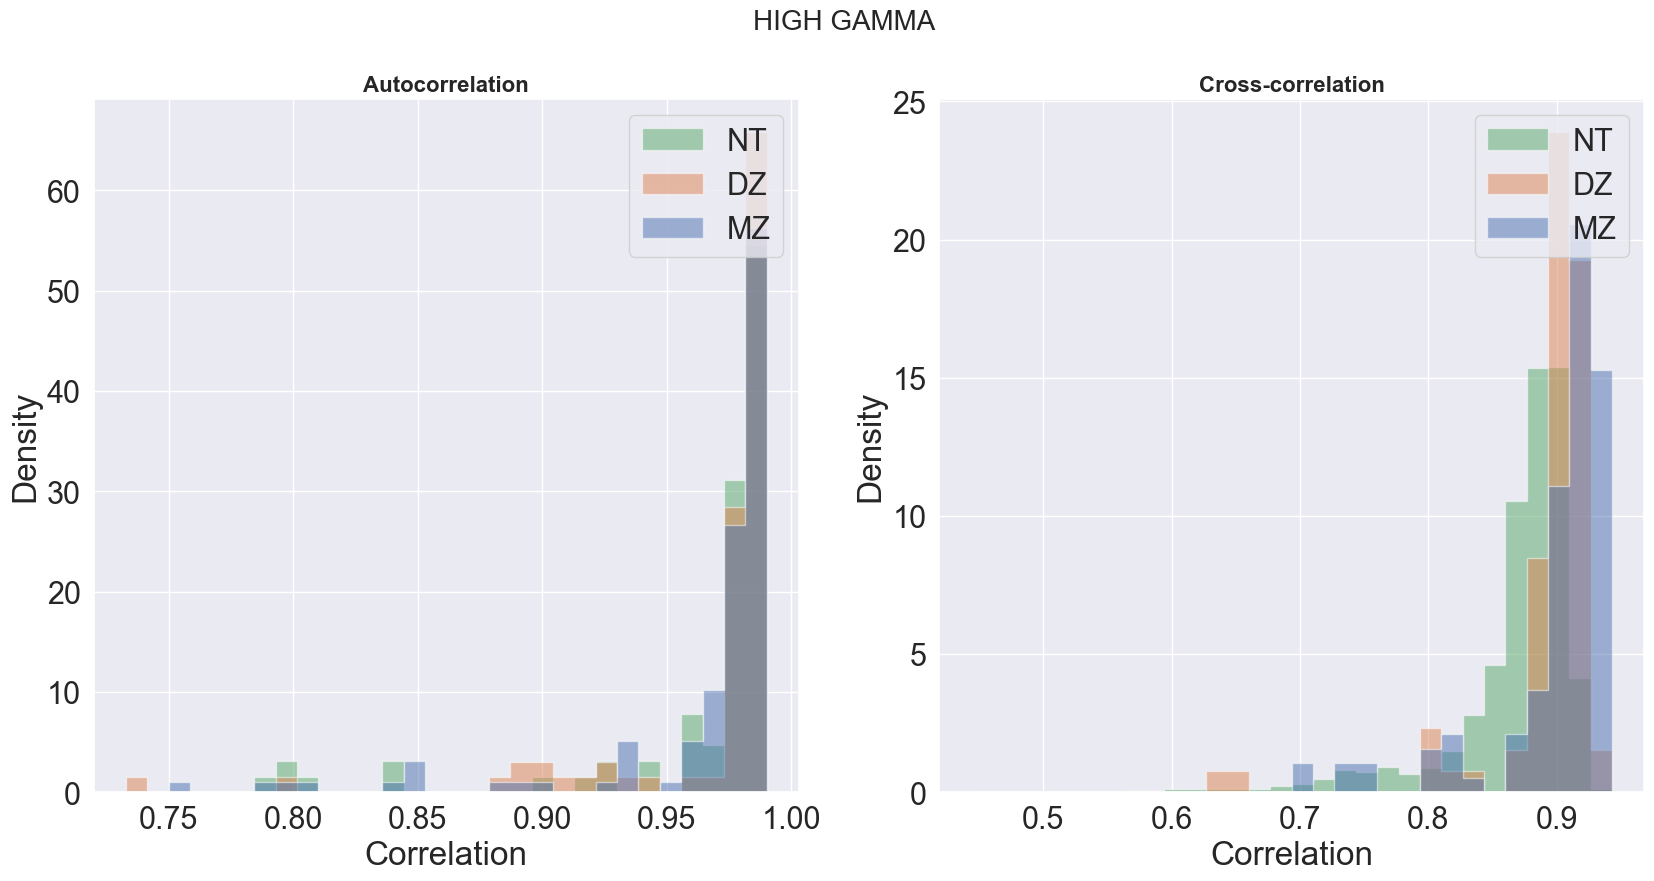

In [74]:
bands = all_corr["FreqBand"].unique()
for band in bands : 
    
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols= 2, figsize = (20, 9))

    auto_corr = all_corr.loc[all_corr["FreqBand"] == band].loc[all_corr["TypeCorr"] == "Autocorr"]
    ax0.hist([auto_corr.loc[auto_corr["TwinType"] == "MZ"]["values"], auto_corr.loc[auto_corr["TwinType"] == "DZ"]["values"], auto_corr.loc[auto_corr["TwinType"] == "NT"]["values"]], bins=30, alpha = 0.5, label=["MZ", "DZ", "NT"], histtype="stepfilled", density = True)
    ax0.legend(loc = "upper right")
    ax0.set_xlabel("Correlation")
    ax0.set_ylabel("Density") 
    ax0.set_title("Autocorrelation", fontweight = "bold", size = 16)   

    cross_corr = all_corr.loc[all_corr["FreqBand"] == band].loc[all_corr["TypeCorr"] == "Crosscorr"]
    ax1.hist([cross_corr.loc[cross_corr["TwinType"] == "MZ"]["values"], cross_corr.loc[cross_corr["TwinType"] == "DZ"]["values"], cross_corr.loc[cross_corr["TwinType"] == "NT"]["values"]], bins=30, alpha = 0.5, label=["MZ", "DZ", "NT"], histtype="stepfilled", density = True)
    ax1.legend(loc = "upper right")
    ax1.set_xlabel("Correlation")
    ax1.set_ylabel("Density")
    ax1.set_title("Cross-correlation", fontweight = "bold", size = 16)   

    fig.suptitle(band, fontsize=20)


## Plot accuracies

In [88]:
all_acc.head()

,values,AccType,FreqBand
0,0.925000,Autocorr,BROADBAND
1,0.647059,Crosscorr MZ,BROADBAND
2,0.125000,Crosscorr DZ,BROADBAND
3,0.787500,Autocorr,DELTA
4,0.352941,Crosscorr MZ,DELTA


Text(0, 0.5, 'Accuracy')

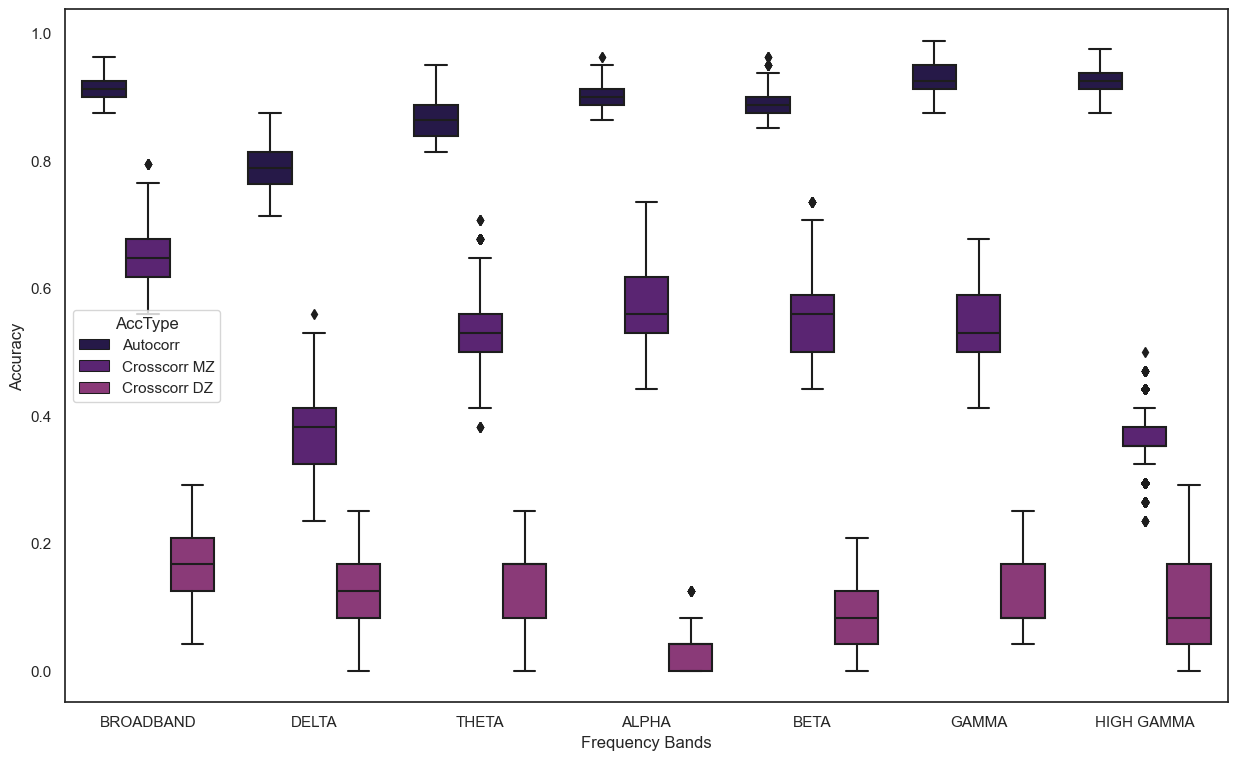

In [98]:
sns.set(font_scale=1.3)
sns.set(style="white")
_, ax = plt.subplots(figsize = (15, 9))
ax = sns.boxplot(data = all_acc, x = "FreqBand", y = "values", hue="AccType", palette=discrete_map)
ax.set_xlabel("Frequency Bands")
ax.set_ylabel("Accuracy")

<Axes: xlabel='FreqBand', ylabel='values'>

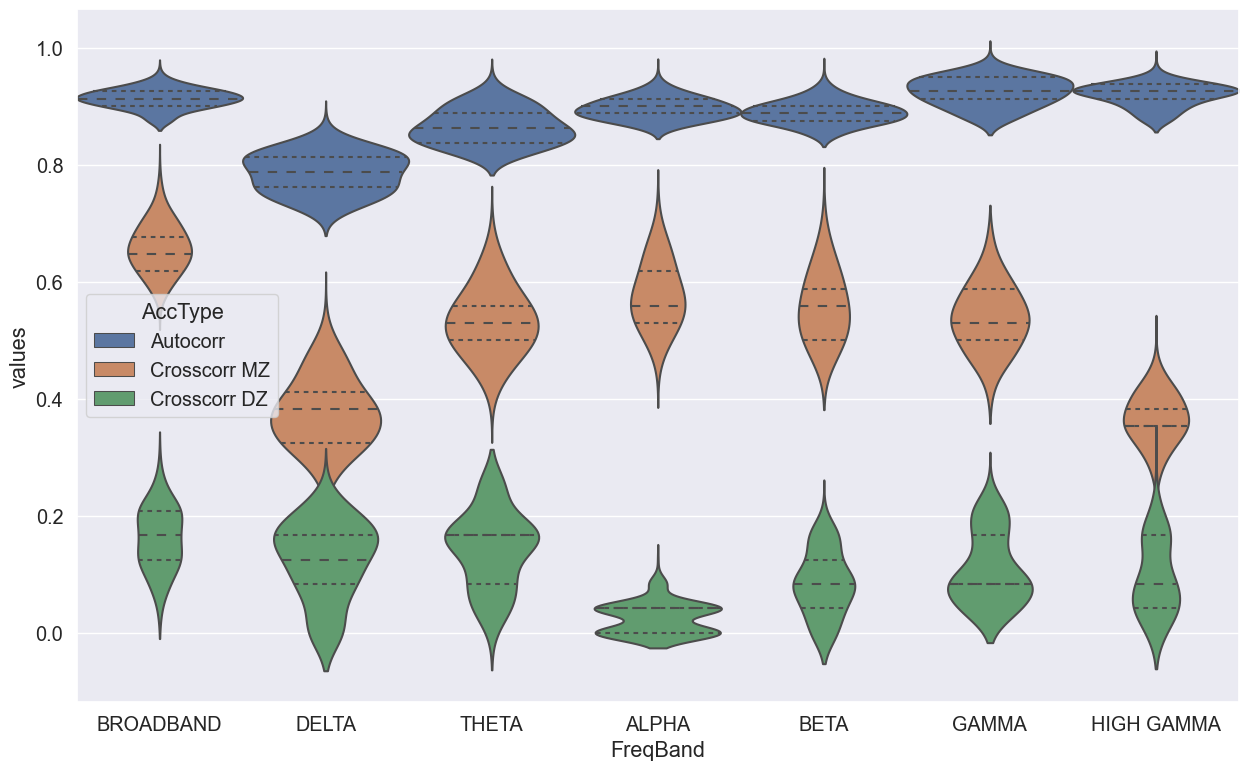

In [12]:
_, ax = plt.subplots(figsize = (15, 9))
sns.violinplot(data = all_acc, x = "FreqBand", y = "values", hue="AccType", dodge=False, bw = 0.5, inner = "quartile", width=1, saturation=0.7)


# Dataset A against Dataset B

In [119]:
datasetA = 1
datasetB = 3

In [120]:
all_corr_path = os.path.join(RESULTS, "PSD_correlations", "Dataset_" + str(datasetA) + "_VS_Dataset" + str(datasetB), "All_correlations_per_class_band_merge.csv")
all_corr = pd.read_csv(all_corr_path, index_col = 0)

all_corr = pd.DataFrame(all_corr.stack()).reset_index().rename(columns={"level_1" : "columns", 0 : "values"})
all_corr["columns"] = all_corr["columns"].apply(lambda x : re.split(" |_", x))
all_corr["TypeCorr"] = all_corr["columns"].apply(lambda x : x[0])
all_corr["TwinType"] = all_corr["columns"].apply(lambda x : x[1])
all_corr["FreqBand"] = all_corr["columns"].apply(lambda x : " ".join(x[2:]))

all_corr.drop(columns=["level_0", "columns"], inplace = True)

In [121]:
all_corr

,values,TypeCorr,TwinType,FreqBand
0,0.939374,Autocorr,MZ,BROADBAND
1,0.969248,Autocorr,DZ,BROADBAND
2,0.984063,Autocorr,NT,BROADBAND
3,0.893391,Crosscorr,MZ,BROADBAND
4,0.856031,Crosscorr,DZ,BROADBAND
...,...,...,...,...
16466,0.698494,Crosscorr,NT,THETA
16467,0.779323,Crosscorr,NT,ALPHA
16468,0.785859,Crosscorr,NT,BETA
16469,0.731401,Crosscorr,NT,GAMMA


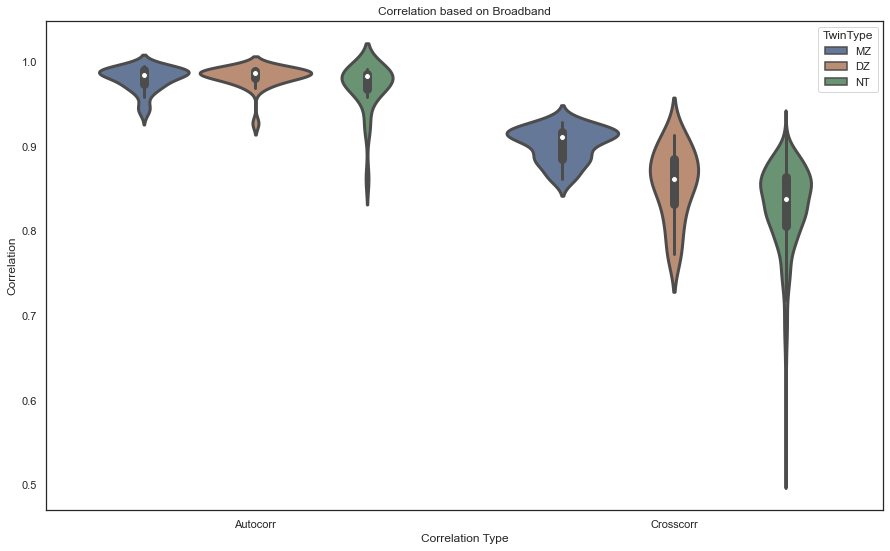

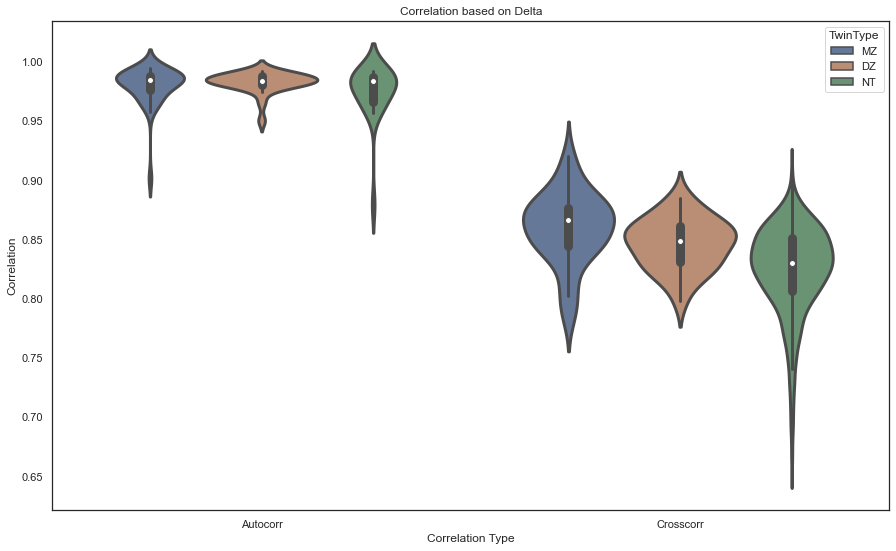

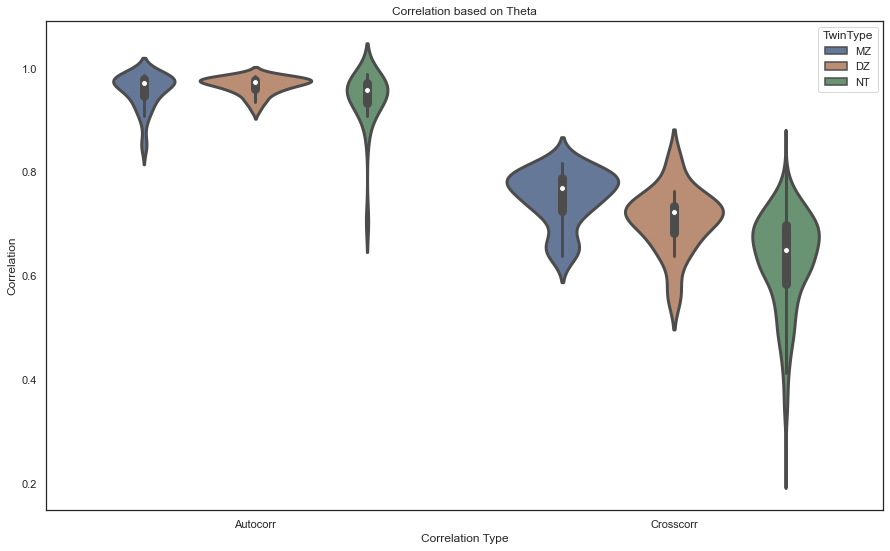

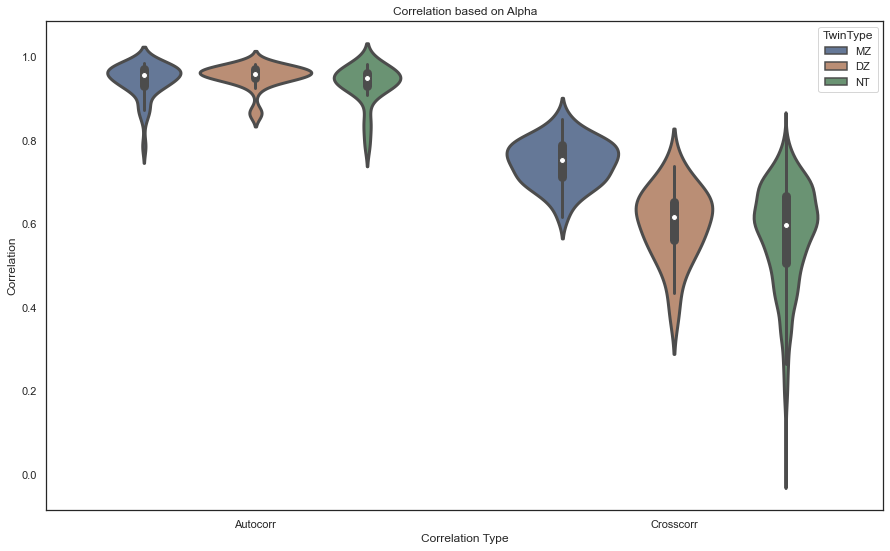

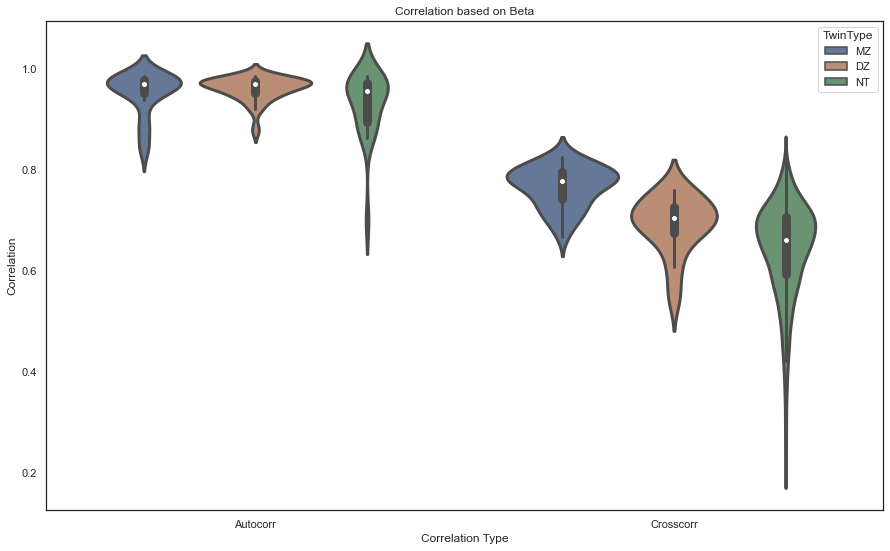

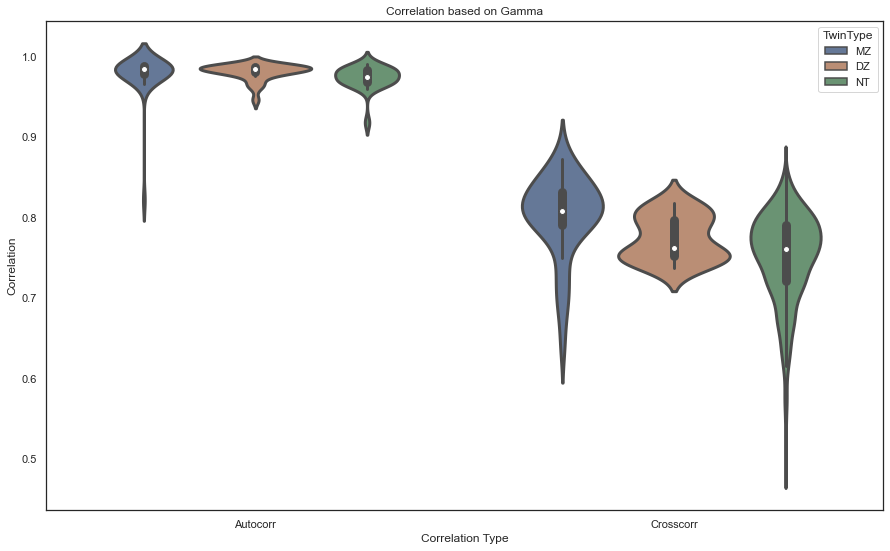

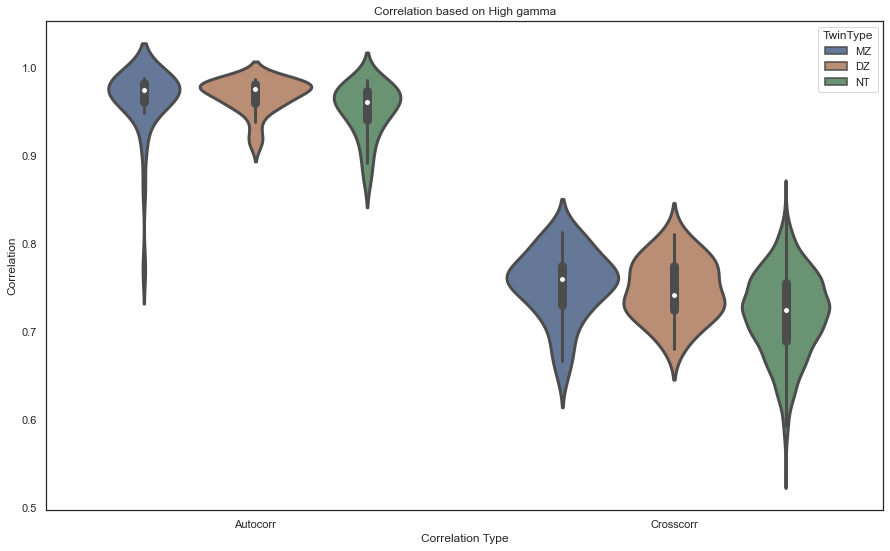

In [122]:
bands = all_corr["FreqBand"].unique()
for band in bands : 
    _, ax = plt.subplots(figsize = (15, 9))
    sns.violinplot(data=all_corr[all_corr["FreqBand"] == band], x="TypeCorr", y="values", hue="TwinType", linewidth=3, saturation=0.5)
    ax.set_xlabel("Correlation Type")
    ax.set_ylabel("Correlation")
    ax.set_title("Correlation based on " + band.lower().capitalize())
    

## Compare evolution Datasets

In [35]:
corr_diff_datasets = pd.DataFrame()

In [36]:
for datasetA in range(1, 4):
    for datasetB in range(1, 4):
        if datasetA < datasetB :
            all_corr_path = os.path.join(RESULTS, "PSD_correlations", "Dataset_" + str(datasetA) + "_VS_Dataset" + str(datasetB), "All_correlations_per_class_band_merge.csv")
            all_corr = pd.read_csv(all_corr_path, index_col = 0)

            all_corr = pd.DataFrame(all_corr.stack()).reset_index().rename(columns={"level_1" : "columns", 0 : "values"})
            all_corr["columns"] = all_corr["columns"].apply(lambda x : re.split(" |_", x))
            all_corr["TypeCorr"] = all_corr["columns"].apply(lambda x : x[0])
            all_corr["TwinType"] = all_corr["columns"].apply(lambda x : x[1])
            all_corr["FreqBand"] = all_corr["columns"].apply(lambda x : " ".join(x[2:]))

            all_corr.drop(columns=["level_0", "columns"], inplace = True)

            all_corr["Dataset"] = str(datasetA) + "_VS_" + str(datasetB)

            corr_diff_datasets = pd.concat([corr_diff_datasets, all_corr], axis = 0)

In [38]:
corr_diff_datasets.tail()

,values,TypeCorr,TwinType,FreqBand,Dataset
16466,0.649228,Crosscorr,NT,THETA,2_VS_3
16467,0.750246,Crosscorr,NT,ALPHA,2_VS_3
16468,0.779924,Crosscorr,NT,BETA,2_VS_3
16469,0.723392,Crosscorr,NT,GAMMA,2_VS_3
16470,0.643074,Crosscorr,NT,HIGH GAMMA,2_VS_3


<AxesSubplot:xlabel='TwinType', ylabel='values'>

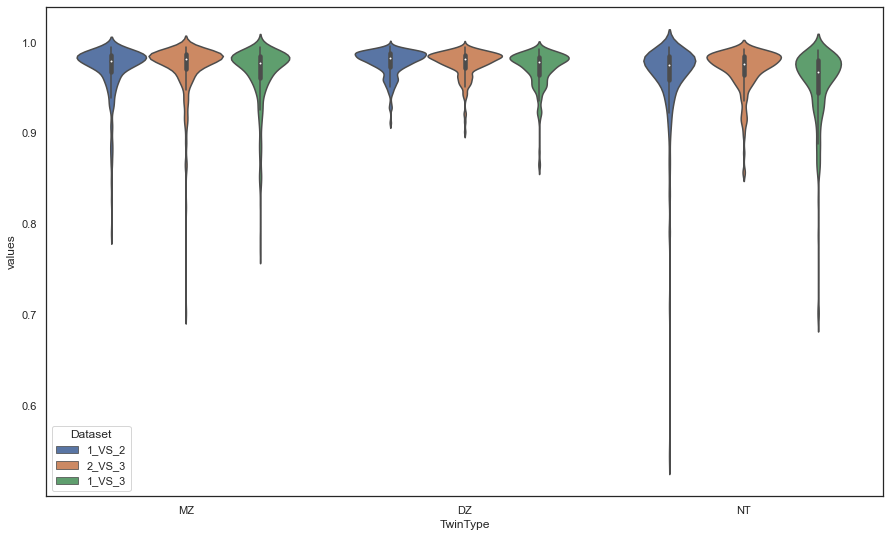

In [47]:
plt.subplots(figsize = (15, 9))
hue_order = ["1_VS_2", "2_VS_3", "1_VS_3"]
sns.violinplot(data = corr_diff_datasets[corr_diff_datasets["TypeCorr"] == "Autocorr"], x = "TwinType",y = "values", hue = "Dataset", hue_order = hue_order, bw = 0.2)

<AxesSubplot:xlabel='TwinType', ylabel='values'>

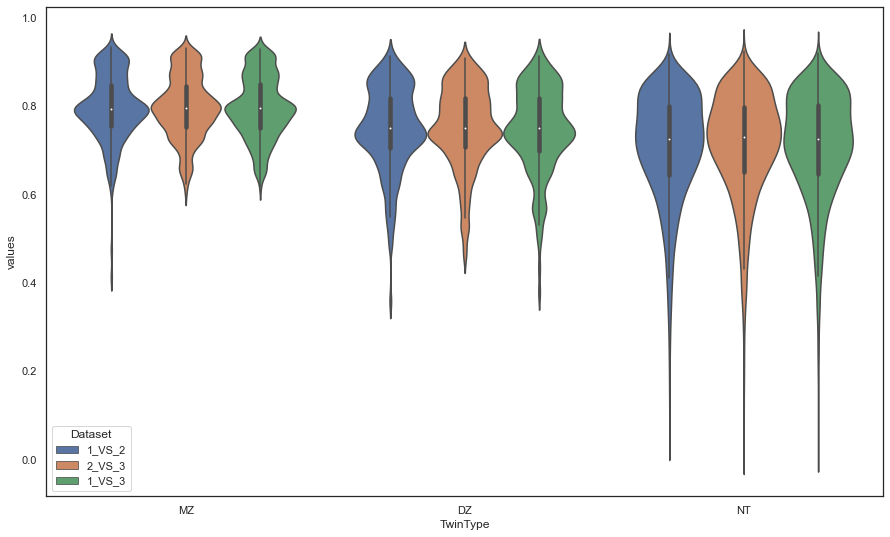

In [48]:
plt.subplots(figsize = (15, 9))
hue_order = ["1_VS_2", "2_VS_3", "1_VS_3"]
sns.violinplot(data = corr_diff_datasets[corr_diff_datasets["TypeCorr"] == "Crosscorr"], x = "TwinType",y = "values", hue = "Dataset", hue_order = hue_order, bw = 0.2)